___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# conda install -c conda-forge xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import sklearn

sklearn.__version__

'1.2.2'

In [4]:
import xgboost

xgboost.__version__

'1.7.4'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
df_male = pd.read_csv(
    "https://query.data.world/s/nfav3jkd5v6mvifoihavefrulidbbg?dws=00000", encoding="latin-1"
)

In [6]:
df_female = pd.read_csv("https://query.data.world/s/mvfmuhvybu2kfl6vc6nf5amtdmexgr?dws=00000")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [7]:
df_male.head().T

0               1               2                       3                       4
subjectid                              10027           10032           10033                   10092                   10093
abdominalextensiondepthsitting           266             233             287                     234                     250
acromialheight                          1467            1395            1430                    1347                    1585
acromionradialelength                    337             326             341                     310                     372
anklecircumference                       222             220             230                     230                     247
axillaheight                            1347            1293            1327                    1239                    1478
balloffootcircumference                  253             245             256                     262                     267
balloffootlength                         202             193             196                     199                     224
biacromialbreadth                        401             394             427                     401                     435
bicepscircumferenceflexed                369             338             408                     359                     356
bicristalbreadth                         274             257             261                     262                     263
bideltoidbreadth                         493             479             544                     518                     524
bimalleolarbreadth                        71              67              75                      73                      80
bitragionchinarc                         319             344             345                     328                     340
bitragionsubmandibulararc                291             320             330                     309                     310
bizygomaticbreadth                       142             135             135                     143                     138
buttockcircumference                     979             944            1054                     991                    1029
buttockdepth                             240             232             258                     242                     275
buttockheight                            882             870             901                     821                    1080
buttockkneelength                        619             584             623                     560                     706
buttockpopliteallength                   509             468             506                     437                     567
calfcircumference                        373             357             412                     395                     425
cervicaleheight                         1535            1471            1501                    1423                    1684
chestbreadth                             291             269             288                     296                     304
chestcircumference                      1074            1021            1120                    1114                    1048
chestdepth                               259             253             267                     262                     232
chestheight                             1292            1244            1288                    1205                    1452
crotchheight                             877             851             854                     769                    1014
crotchlengthomphalion                    607             615             636                     590                     682
crotchlengthposterioromphalion           351             376             359                     341                     382
earbreadth                                36              33              40                      39                      32
earlength                                 7

In [8]:
df_female.head().T

0                       1                       2                       3             4
SubjectId                                10037                   10038                   10042                   10043         10051
abdominalextensiondepthsitting             231                     194                     183                     261           309
acromialheight                            1282                    1379                    1369                    1356          1303
acromionradialelength                      301                     320                     329                     306           308
anklecircumference                         204                     207                     233                     214           214
axillaheight                              1180                    1292                    1271                    1250          1210
balloffootcircumference                    222                     225                     237                     240           217
balloffootlength                           177                     178                     196                     188           182
biacromialbreadth                          373                     372                     397                     384           378
bicepscircumferenceflexed                  315                     272                     300                     364           320
bicristalbreadth                           263                     250                     276                     276           336
bideltoidbreadth                           466                     430                     450                     484           525
bimalleolarbreadth                          65                      64                      69                      68            67
bitragionchinarc                           338                     294                     309                     340           300
bitragionsubmandibulararc                  301                     270                     270                     294           295
bizygomaticbreadth                         141                     126                     128                     144           135
buttockcircumference                      1011                     893                     987                    1012          1281
buttockdepth                               223                     186                     204                     253           284
buttockheight                              836                     900                     861                     897           811
buttockkneelength                          587                     583                     583                     599           607
buttockpopliteallength                     476                     483                     466                     471           467
calfcircumference                          360                     350                     384                     372           433
cervicaleheight                           1336                    1440                    1451                    1430          1362
chestbreadth                               274                     261                     287                     269           305
chestcircumference                         922                     839                     874                    1008          1089
chestdepth                                 245                     206                     223                     285           290
chestheight                               1095                    1234                    1226                    1170          1112
crotchheight                               759                     835                     821                     804           726
crotchlengthomphalion                      557                     549                     643                     640           686
crotchlengthposterioromphalion             310         

In [9]:
# Check if the columns are the same in both datasets
all(df_male.columns == df_female.columns)

False

In [10]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [11]:
df_female.head(1)

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   

   interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion  weightkg  wristcircumference  wristheight  Gender      Date Installation     Component          Branch PrimaryMOS SubjectsBirthLocation  SubjectNumericRace Ethnicity  DODRace  Age  Heightin  Weightlbs WritingPreference  
0                    645         363          399                   435                496                             447                      55                      404                  118                335                    368                           1268         113              362                   235                   1062                  327             148            803                     809            513  1647     1560                 1280            1013                 622             174            736           430               110                  844                           1488              406           295                 850         217                      345                   942       657                 152          756  Female  5-Oct-10    Fort Hood  Regular Army  Combat Support        92Y               Germany                   2       NaN        2   26        61        142        Right hand

In [12]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [13]:
# Find column names that are in the male dataset but not in the female dataset
male_columns_not_in_female = set(df_male.columns) - set(df_female.columns)

# Find column names that are in the female dataset but not in the male dataset
female_columns_not_in_male = set(df_female.columns) - set(df_male.columns)

male_columns_not_in_female, female_columns_not_in_male

(set(), set())

In [14]:
# Rename 'SubjectId' to 'subjectid' in the female dataset
df_female.rename(columns={'SubjectId': 'subjectid'}, inplace=True)

In [15]:
# Concatenate the two dataframes
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [16]:
df.shape

(6068, 108)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [18]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [19]:
df.isnull().sum().any()

True

In [20]:
df.duplicated().sum()

0

In [21]:
# Rename all column names to lower case
df.columns = df.columns.str.lower()

# Check the new column names
column_names = df.columns.tolist()
column_names

['subjectid',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

In [22]:
# Count the number of occurrences of each value in the 'dodrace' column
value_counts = df['dodrace'].value_counts()
value_counts

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [23]:
# Identify the values that occur less than 500 times
to_remove = value_counts[value_counts < 500].index

# Keep only the rows where 'dodrace' is not in 'to_remove'
df = df[~df['dodrace'].isin(to_remove)]

# Check the new value counts
df['dodrace'].value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [24]:
# Calculate the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Calculate the variance of each column
variances = df.var()

# Create a dataframe to display the results
df_column_analysis = pd.DataFrame({'missing_values_percentage': missing_values, 'variance': variances})

df_column_analysis.sort_values(by='missing_values_percentage', ascending=False).head(10)

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_85945/2016435888.py:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var()


missing_values_percentage     variance
ethnicity                                        80.49922          NaN
abdominalextensiondepthsitting                    0.00000  1403.082863
mentonsellionlength                               0.00000    61.787209
shoulderlength                                    0.00000   153.628108
shoulderelbowlength                               0.00000   498.662102
shouldercircumference                             0.00000  8528.657032
radialestylionlength                              0.00000   384.933291
primarymos                                        0.00000          NaN
poplitealheight                                   0.00000   958.167914
palmlength                                        0.00000    50.486033

In [25]:
# Drop the 'ethnicity' column
df = df.drop(columns=['ethnicity'])

# Check if the column has been dropped
'ethnicity' not in df.columns

True

In [26]:
df.isnull().sum().any()

False

In [27]:
df.shape

(5769, 107)

In [28]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

gender has 2 unique value
date has 253 unique value
installation has 12 unique value
component has 3 unique value
branch has 3 unique value
primarymos has 281 unique value
subjectsbirthlocation has 136 unique value
writingpreference has 3 unique value


In [29]:
# Create an empty dataframe to hold the outlier information
outliers_df = pd.DataFrame(columns=['column', 'outliers_count'])

# Iterate over the columns of the dataframe
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for outliers
    outliers_range = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

    # Count the number of outliers and append to the dataframe
    outliers_df = outliers_df.append({'column': col, 'outliers_count': outliers_range.sum()}, ignore_index=True)

outliers_df.sort_values(by='outliers_count', ascending=False).head(10)

/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_85945/3196891561.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'column': col, 'outliers_count': outliers_range.sum()}, ignore_index=True)
/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_85945/3196891561.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'column': col, 'outliers_count': outliers_range.sum()}, ignore_index=True)
/var/folders/l_/p07ypmtn78b712ssdj3n5zlm0000gn/T/ipykernel_85945/3196891561.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'column': col, 'outliers_count': outliers_range.sum()}, ignore_index=True)
/var/folders/l_/p07

column outliers_count
94       subjectnumericrace            644
53    interpupillarybreadth            105
50               hipbreadth             79
79           thighclearance             77
60  lowerthighcircumference             76
51        hipbreadthsitting             73
4        anklecircumference             73
78       thighcircumference             59
16     buttockcircumference             58
10         bicristalbreadth             57

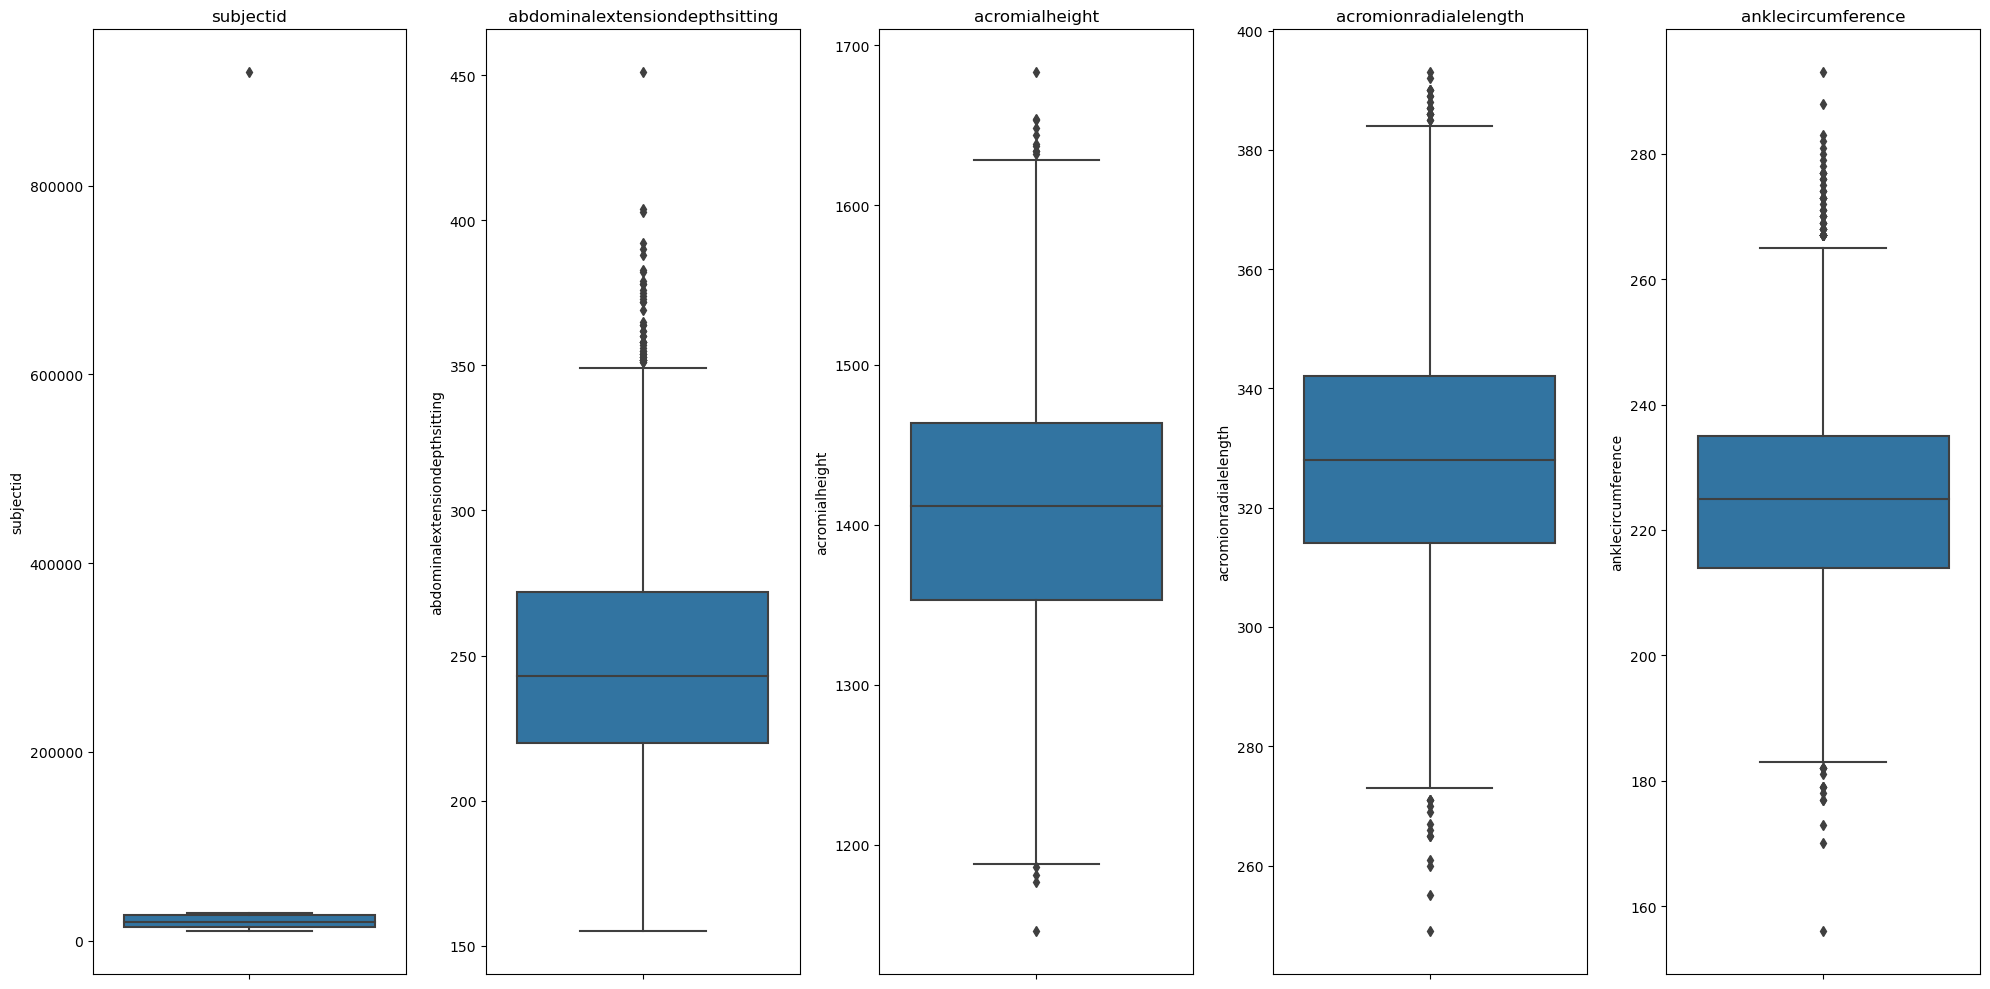

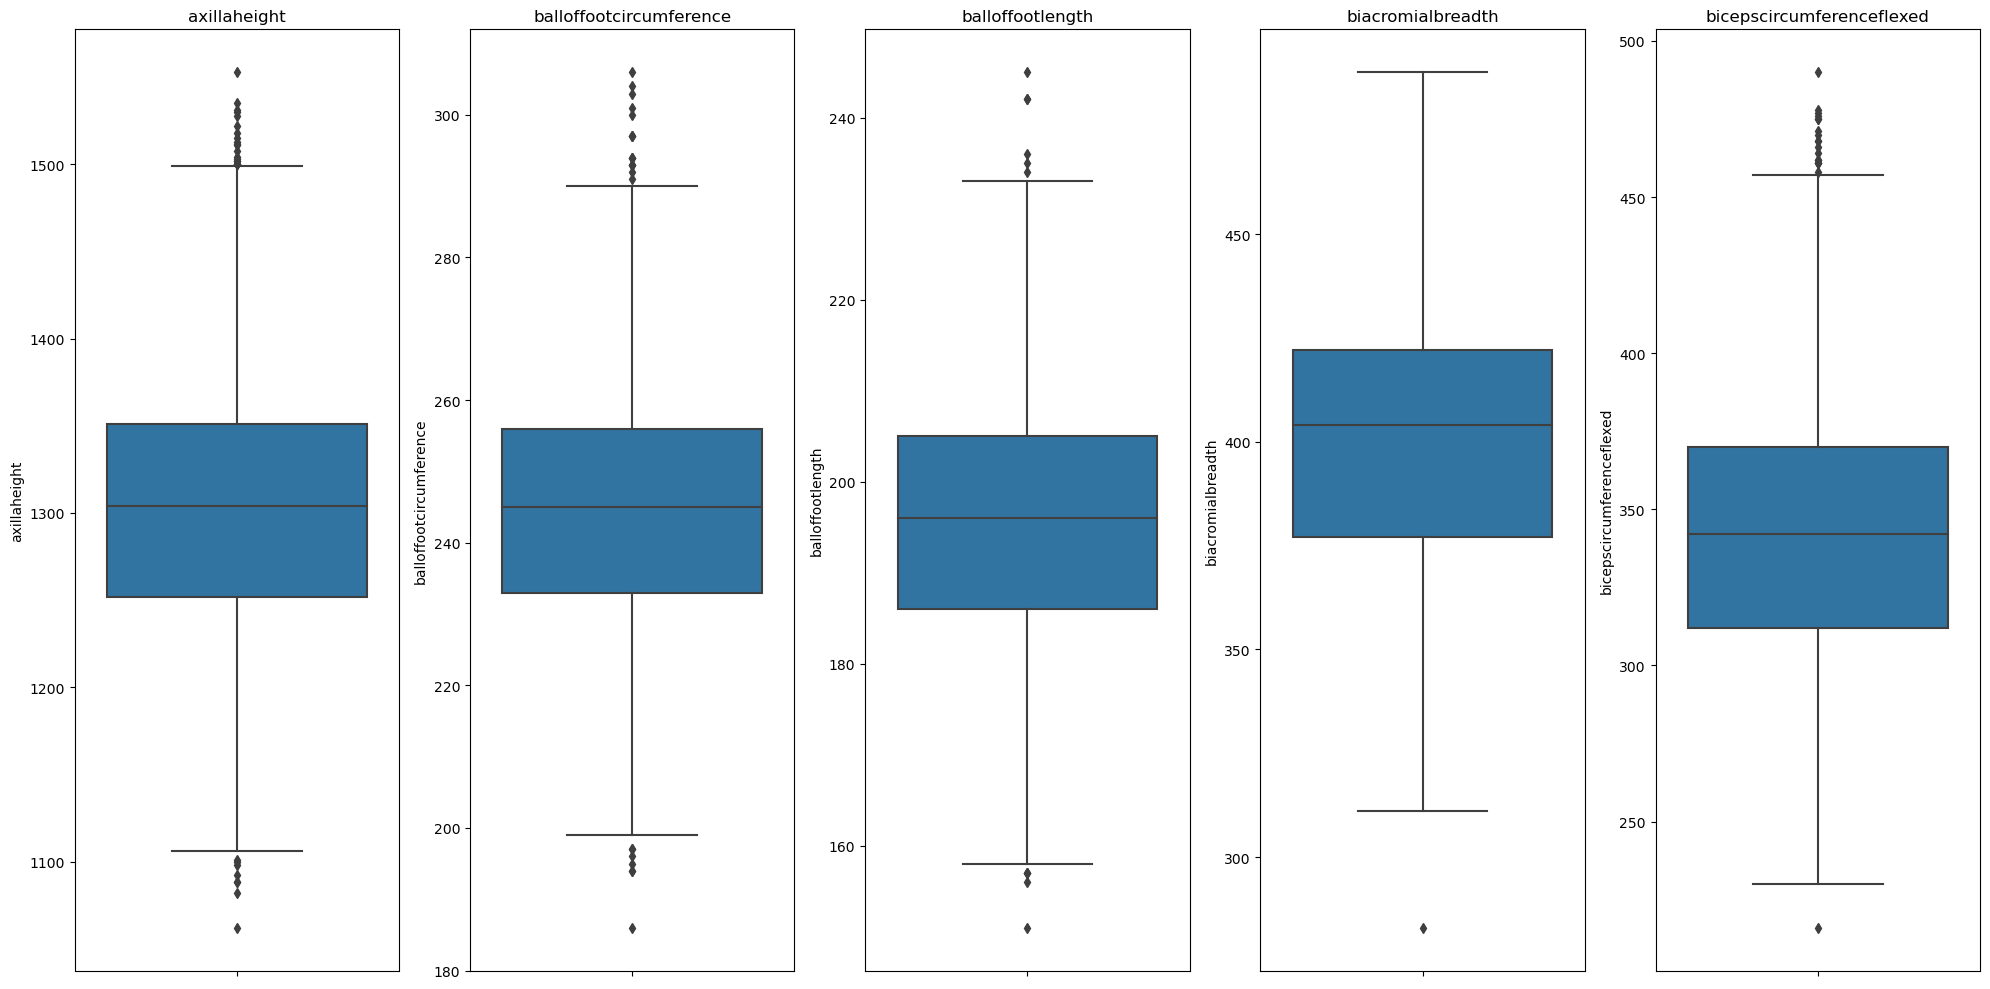

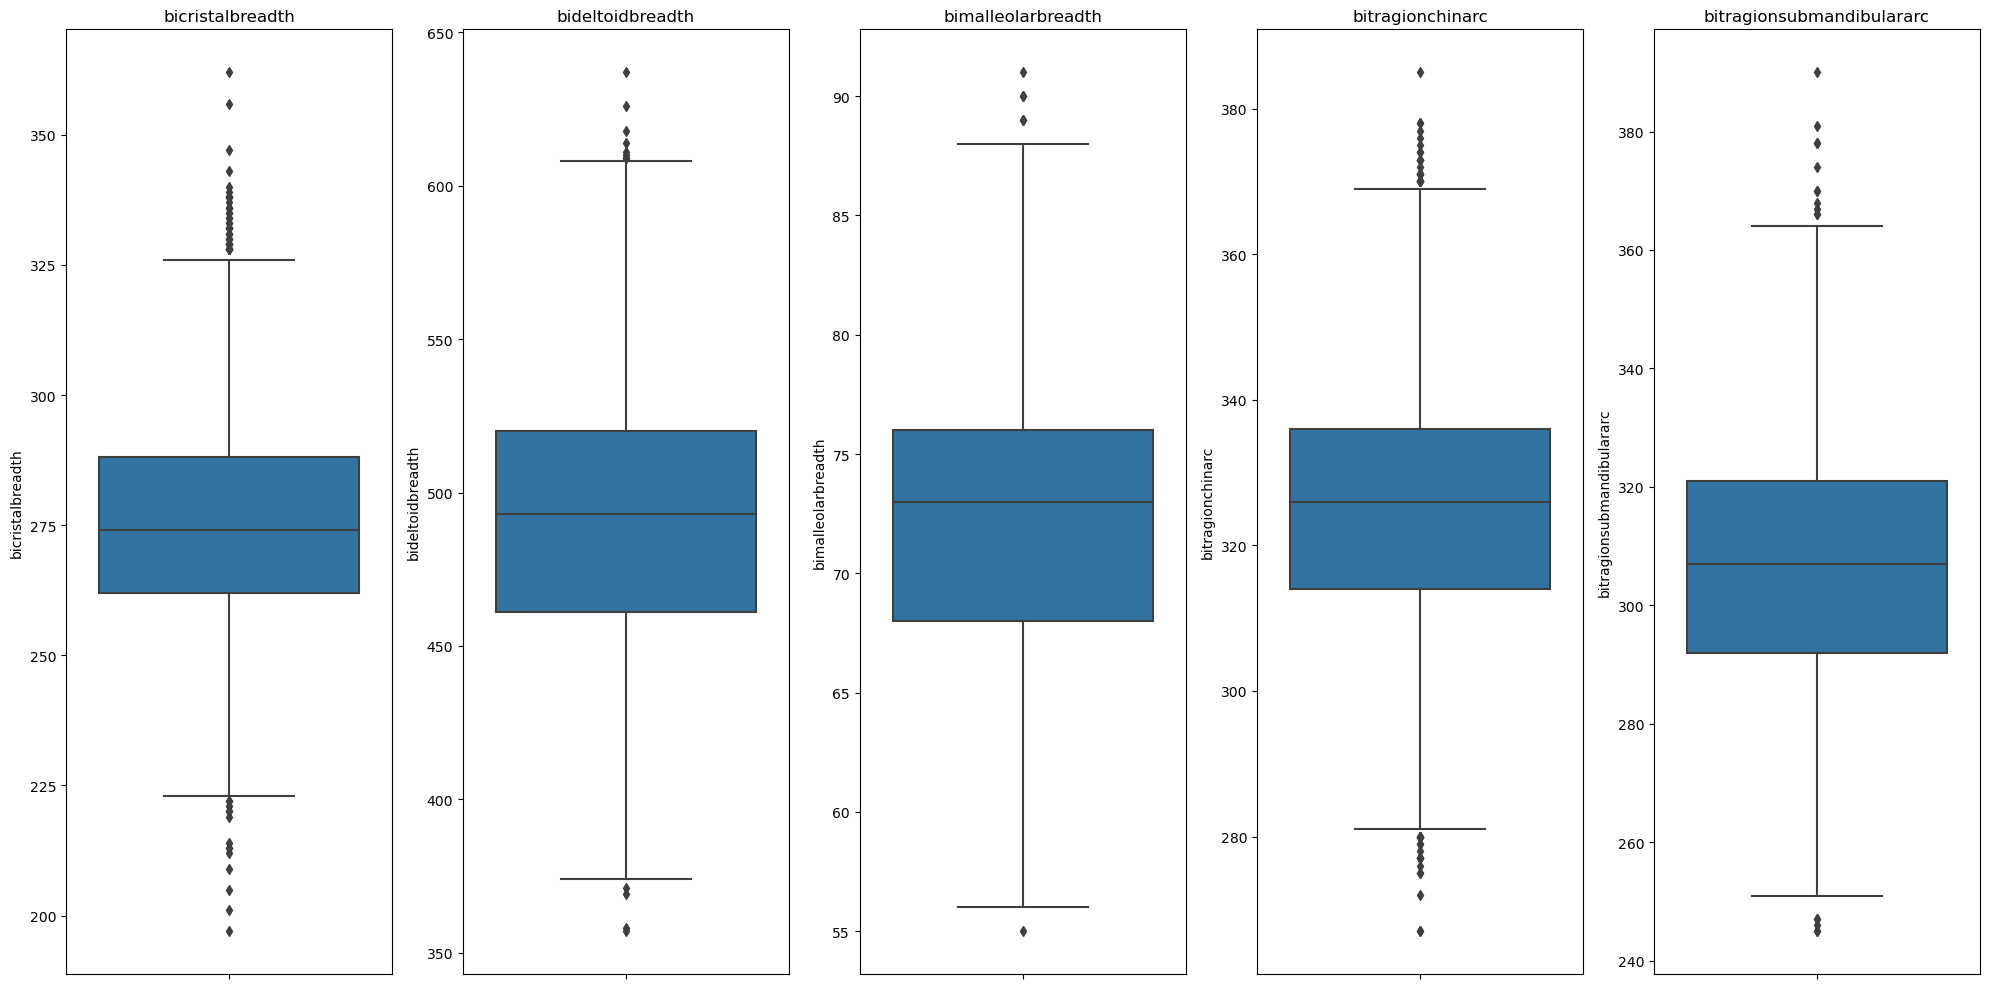

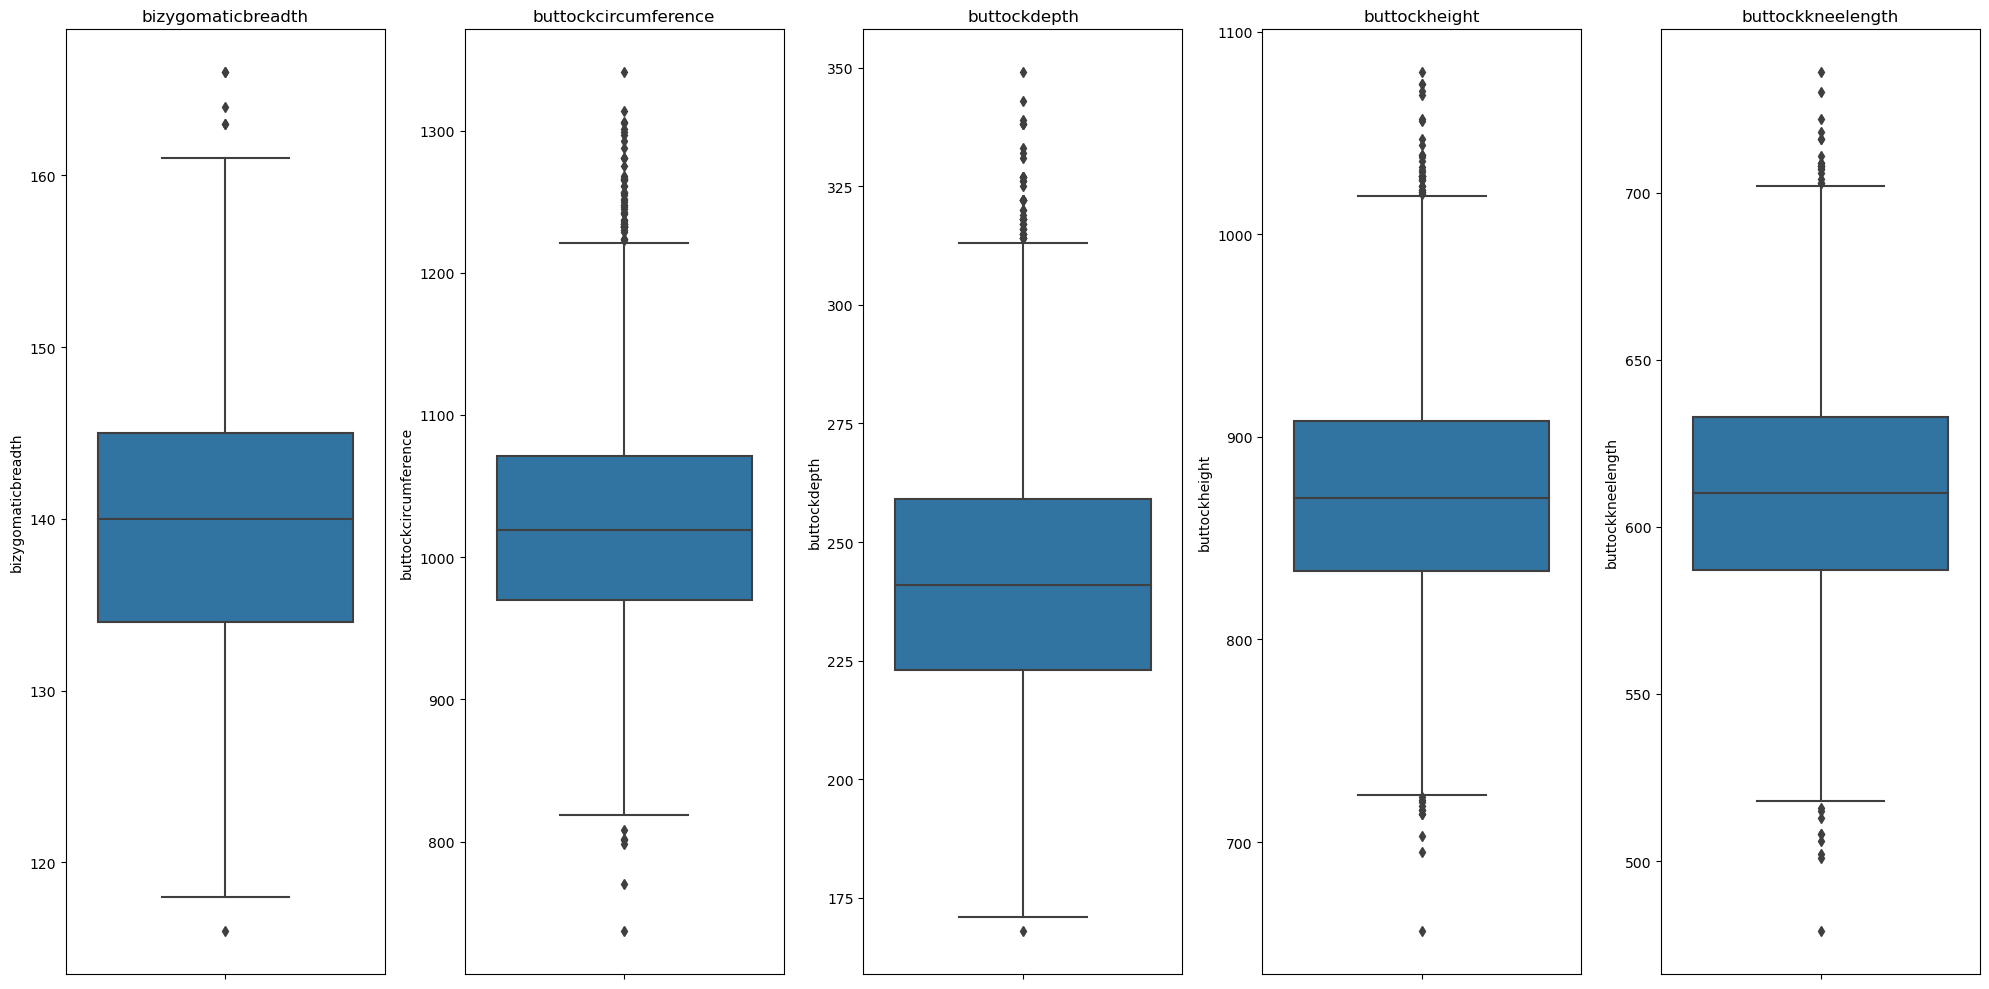

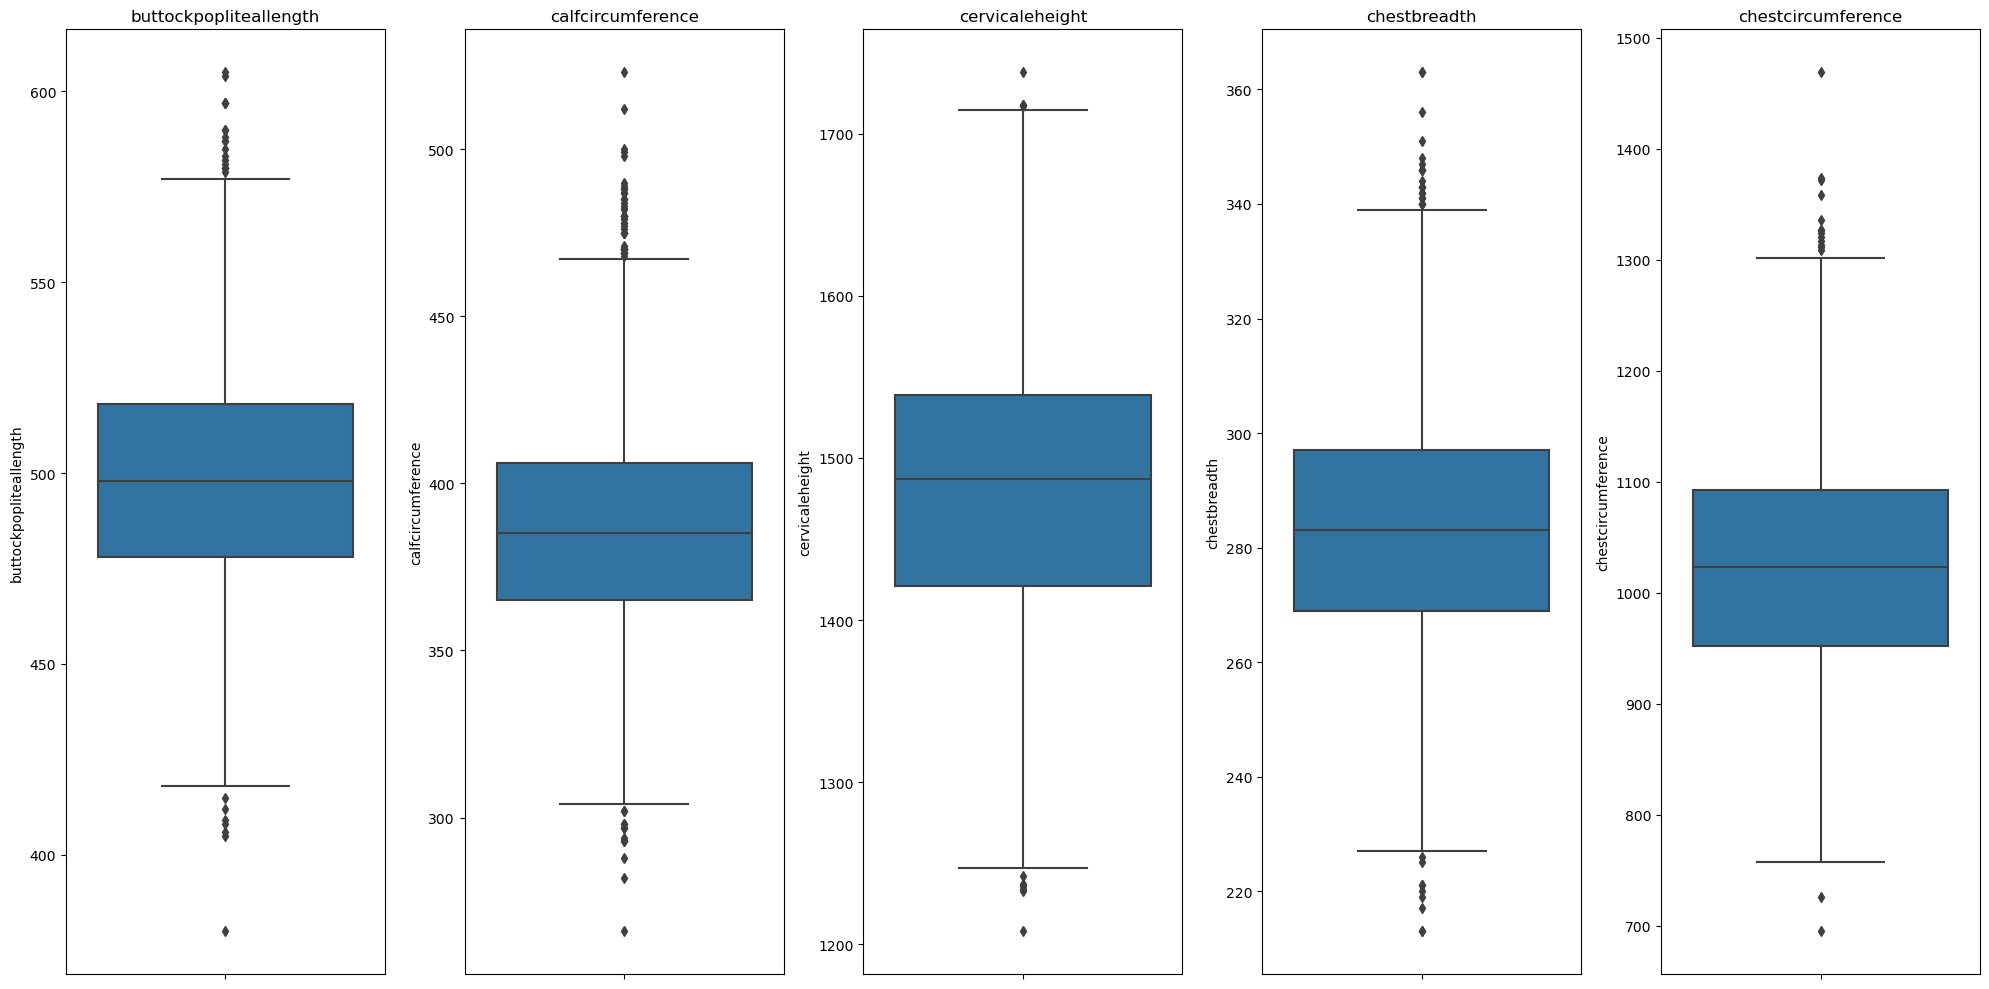

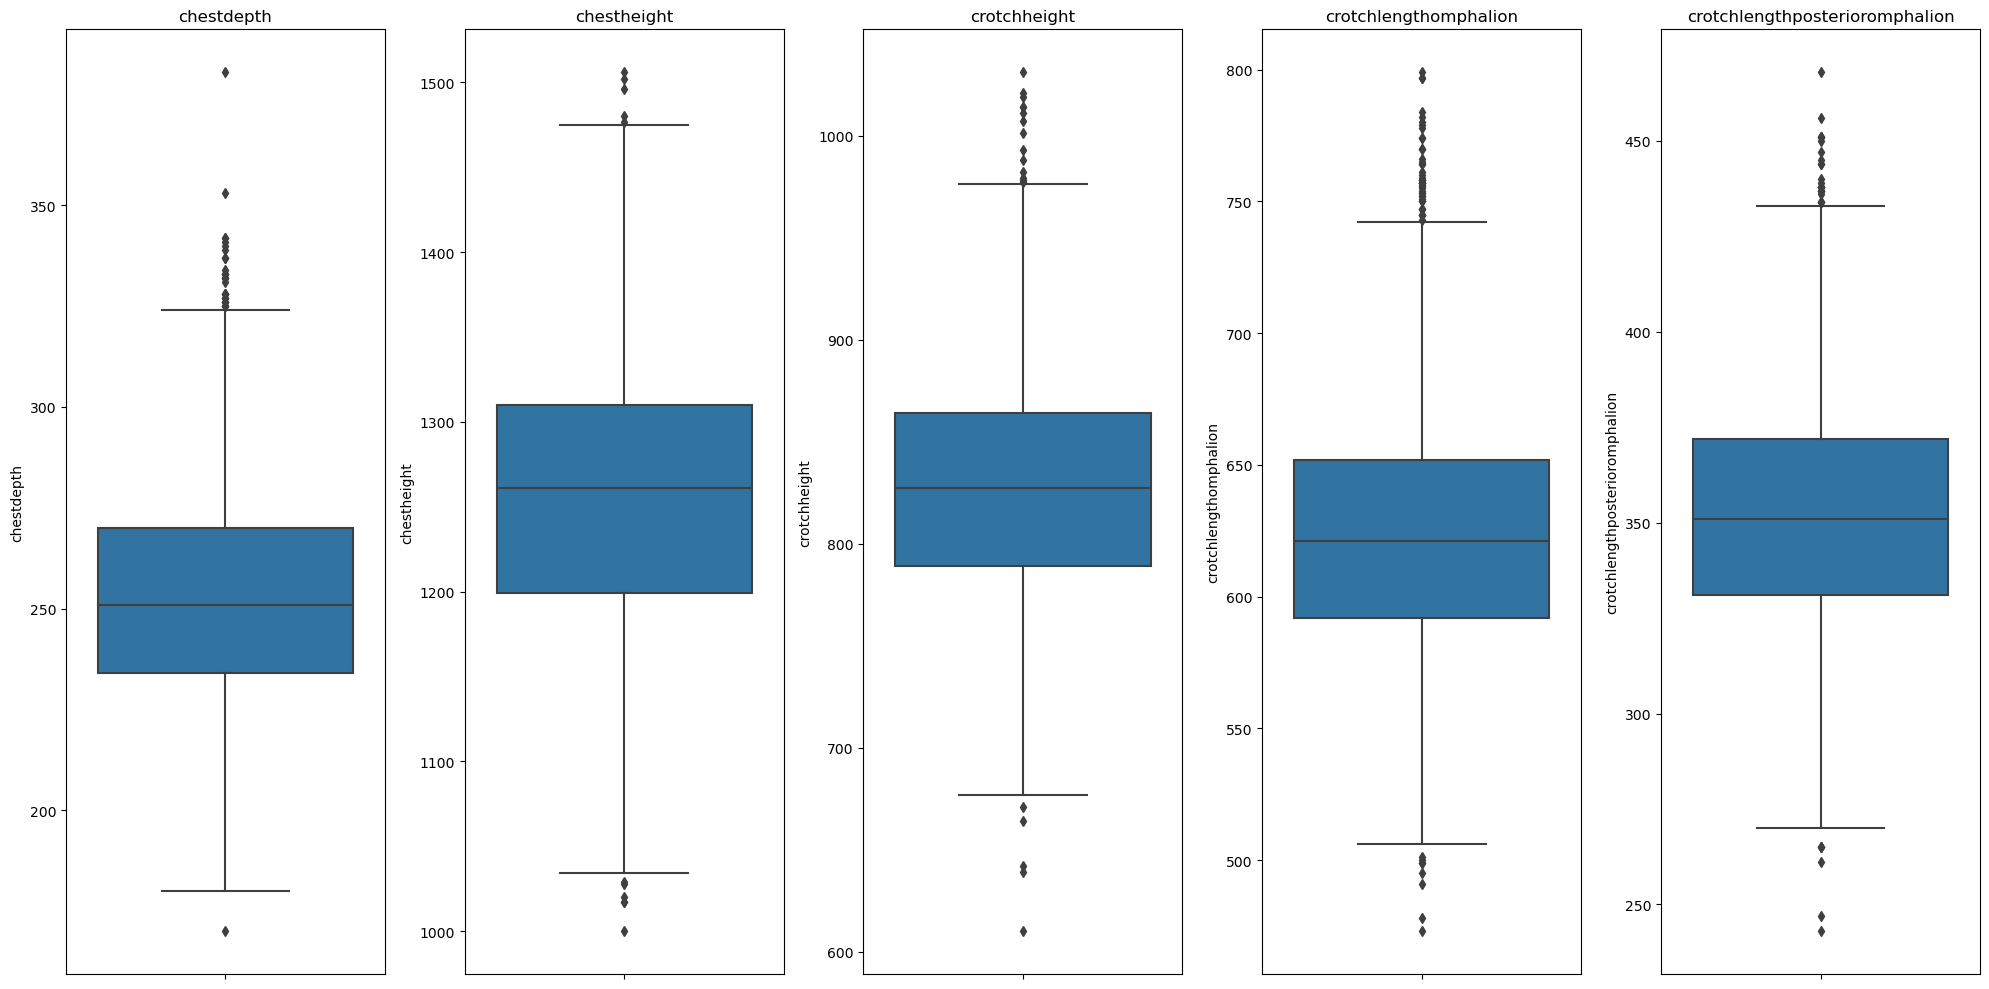

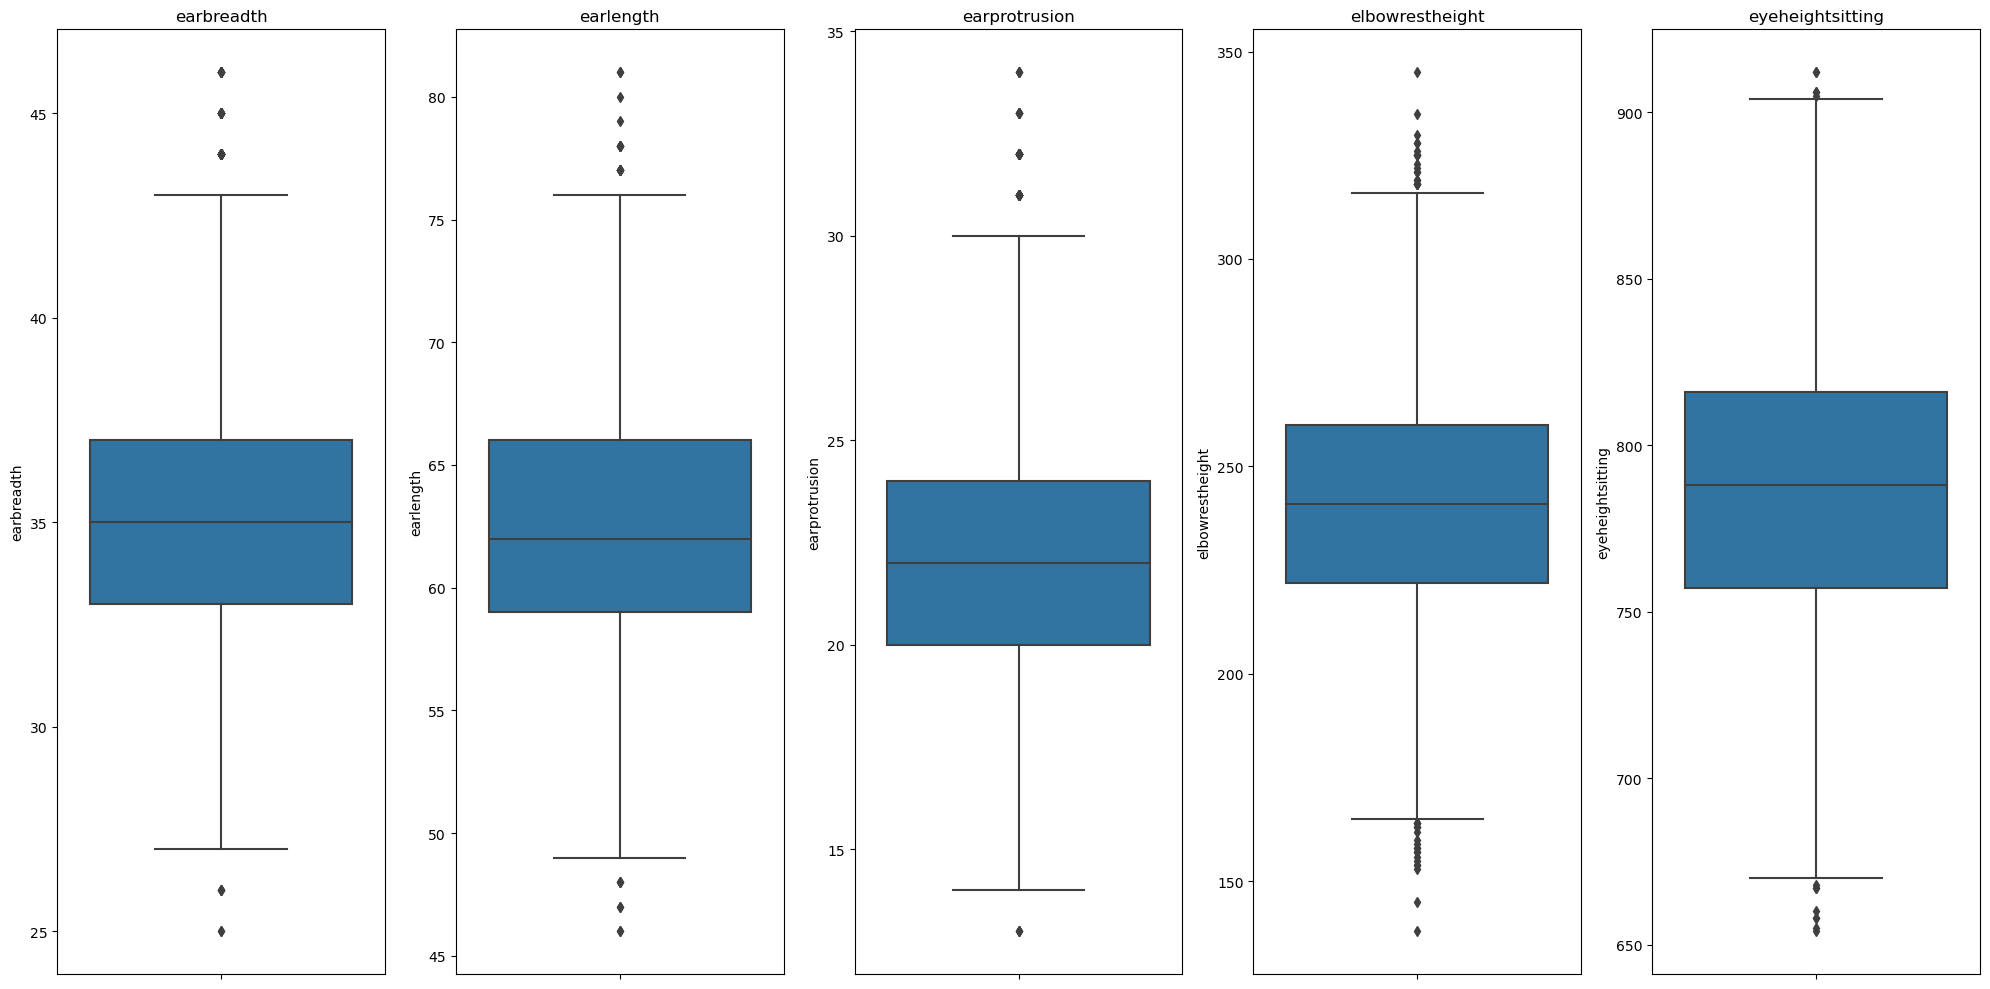

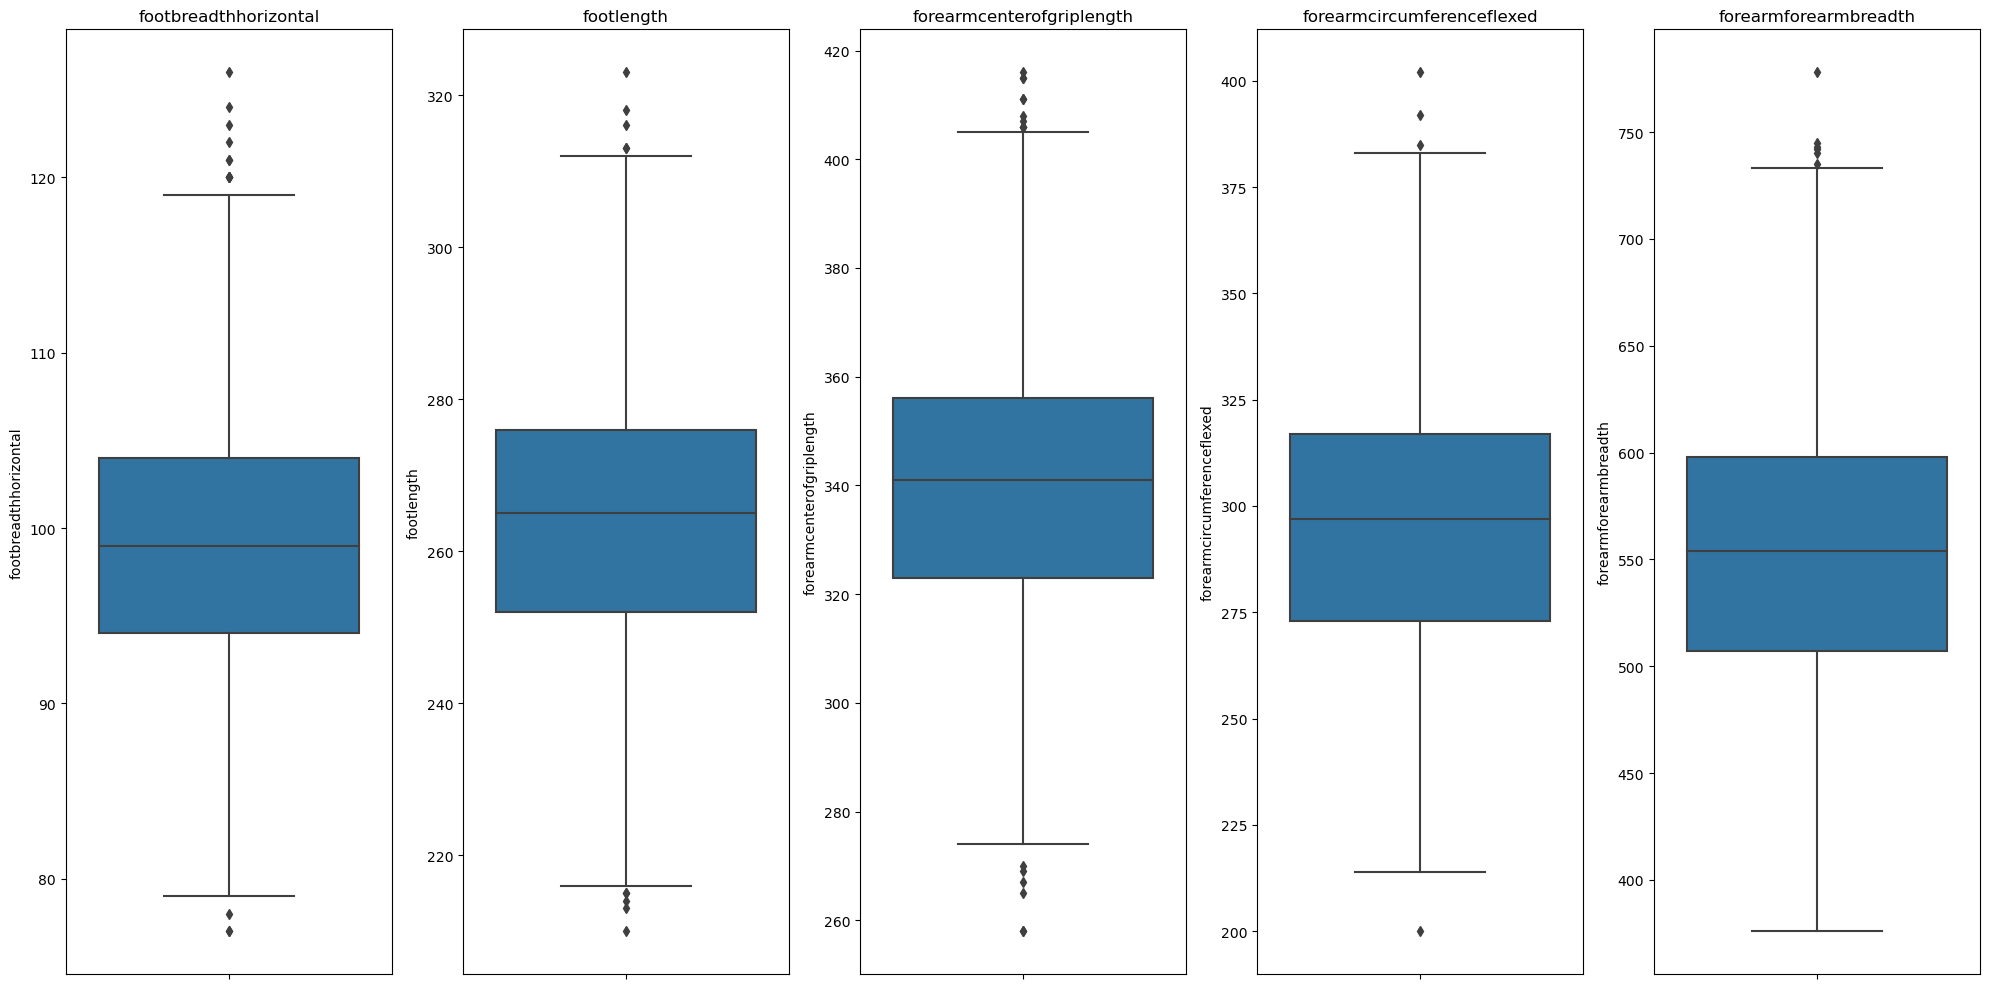

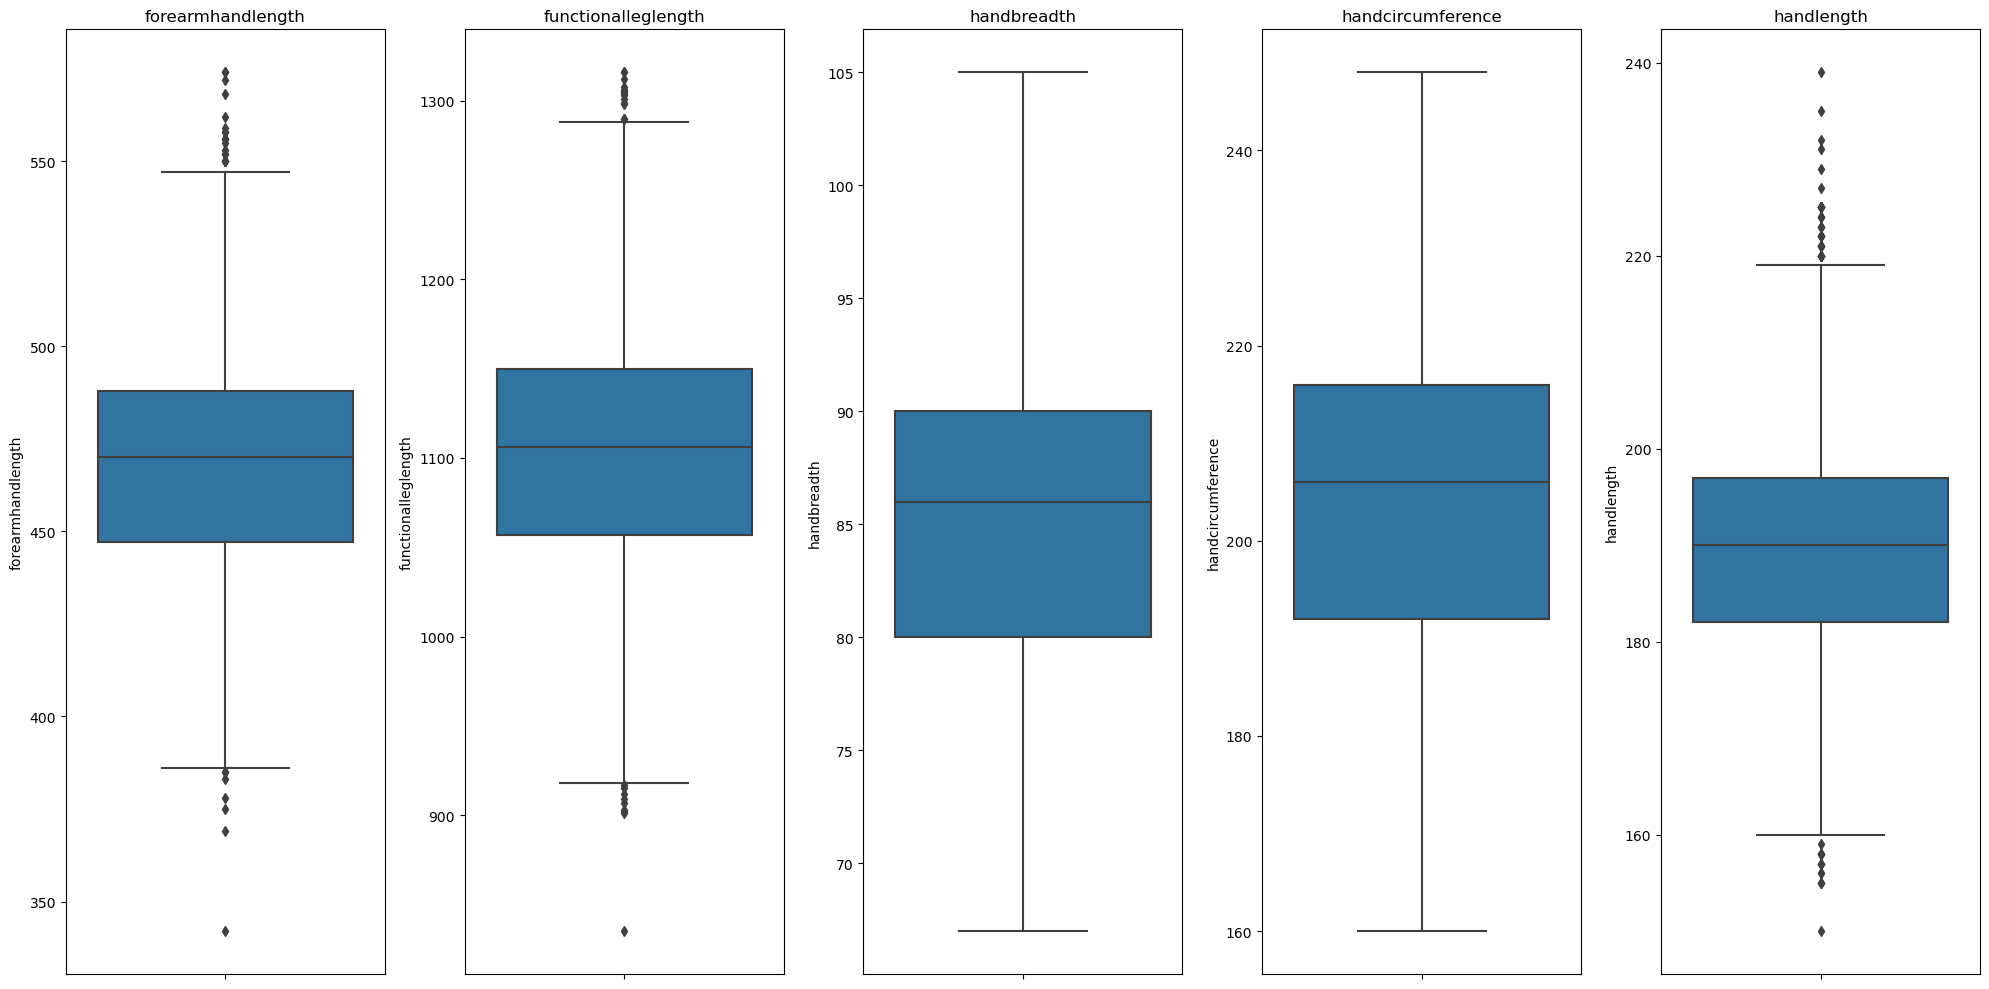

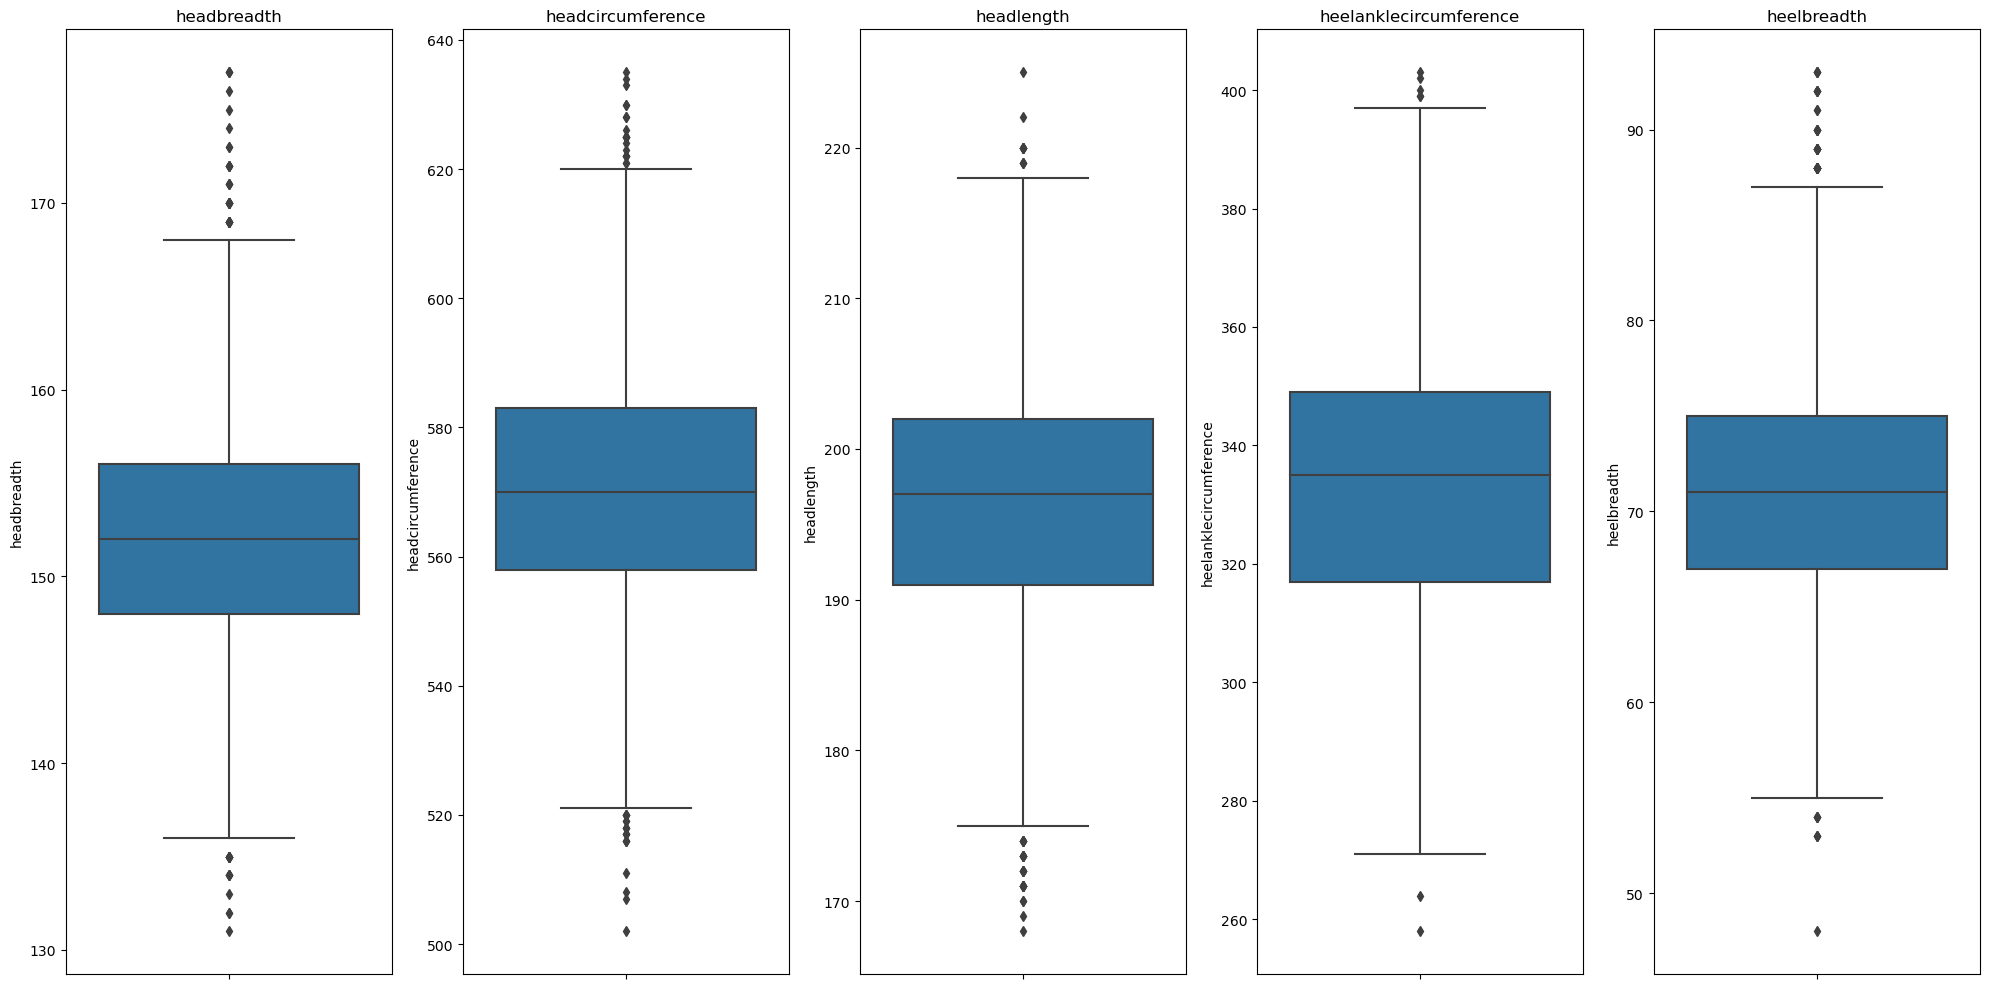

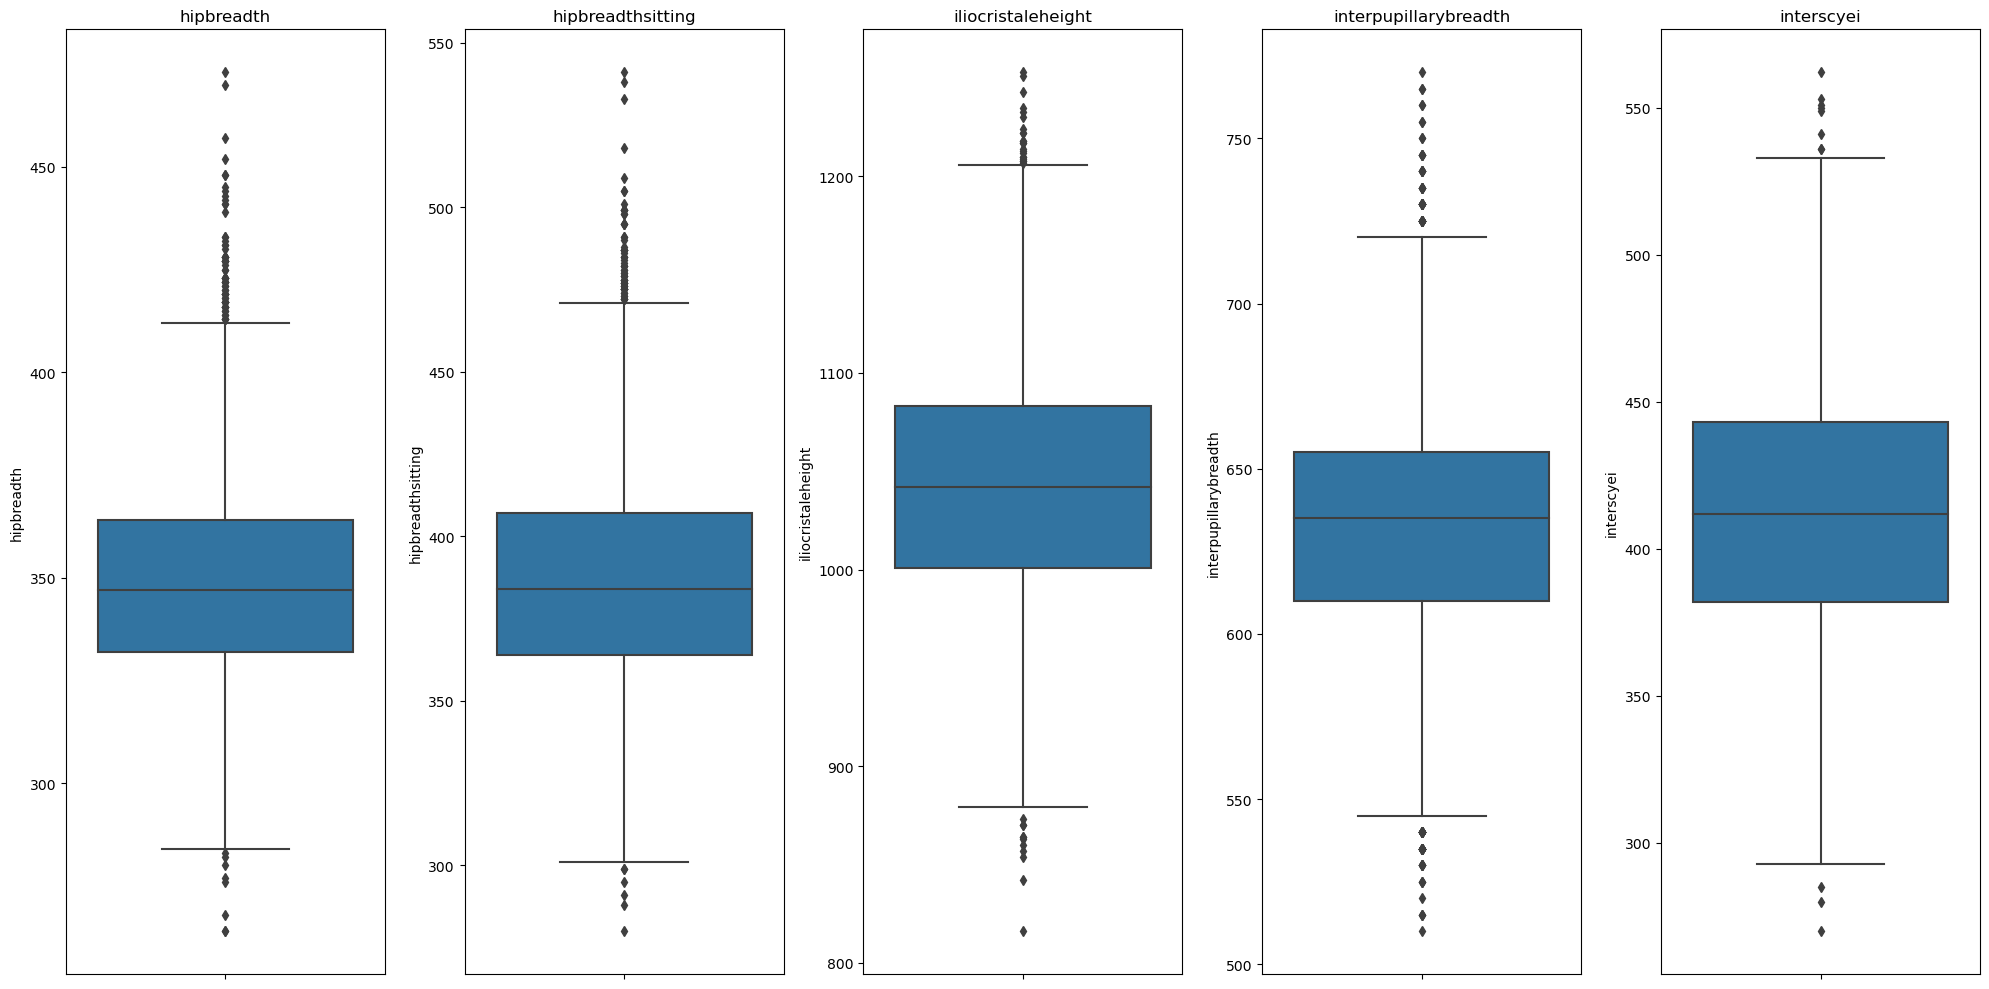

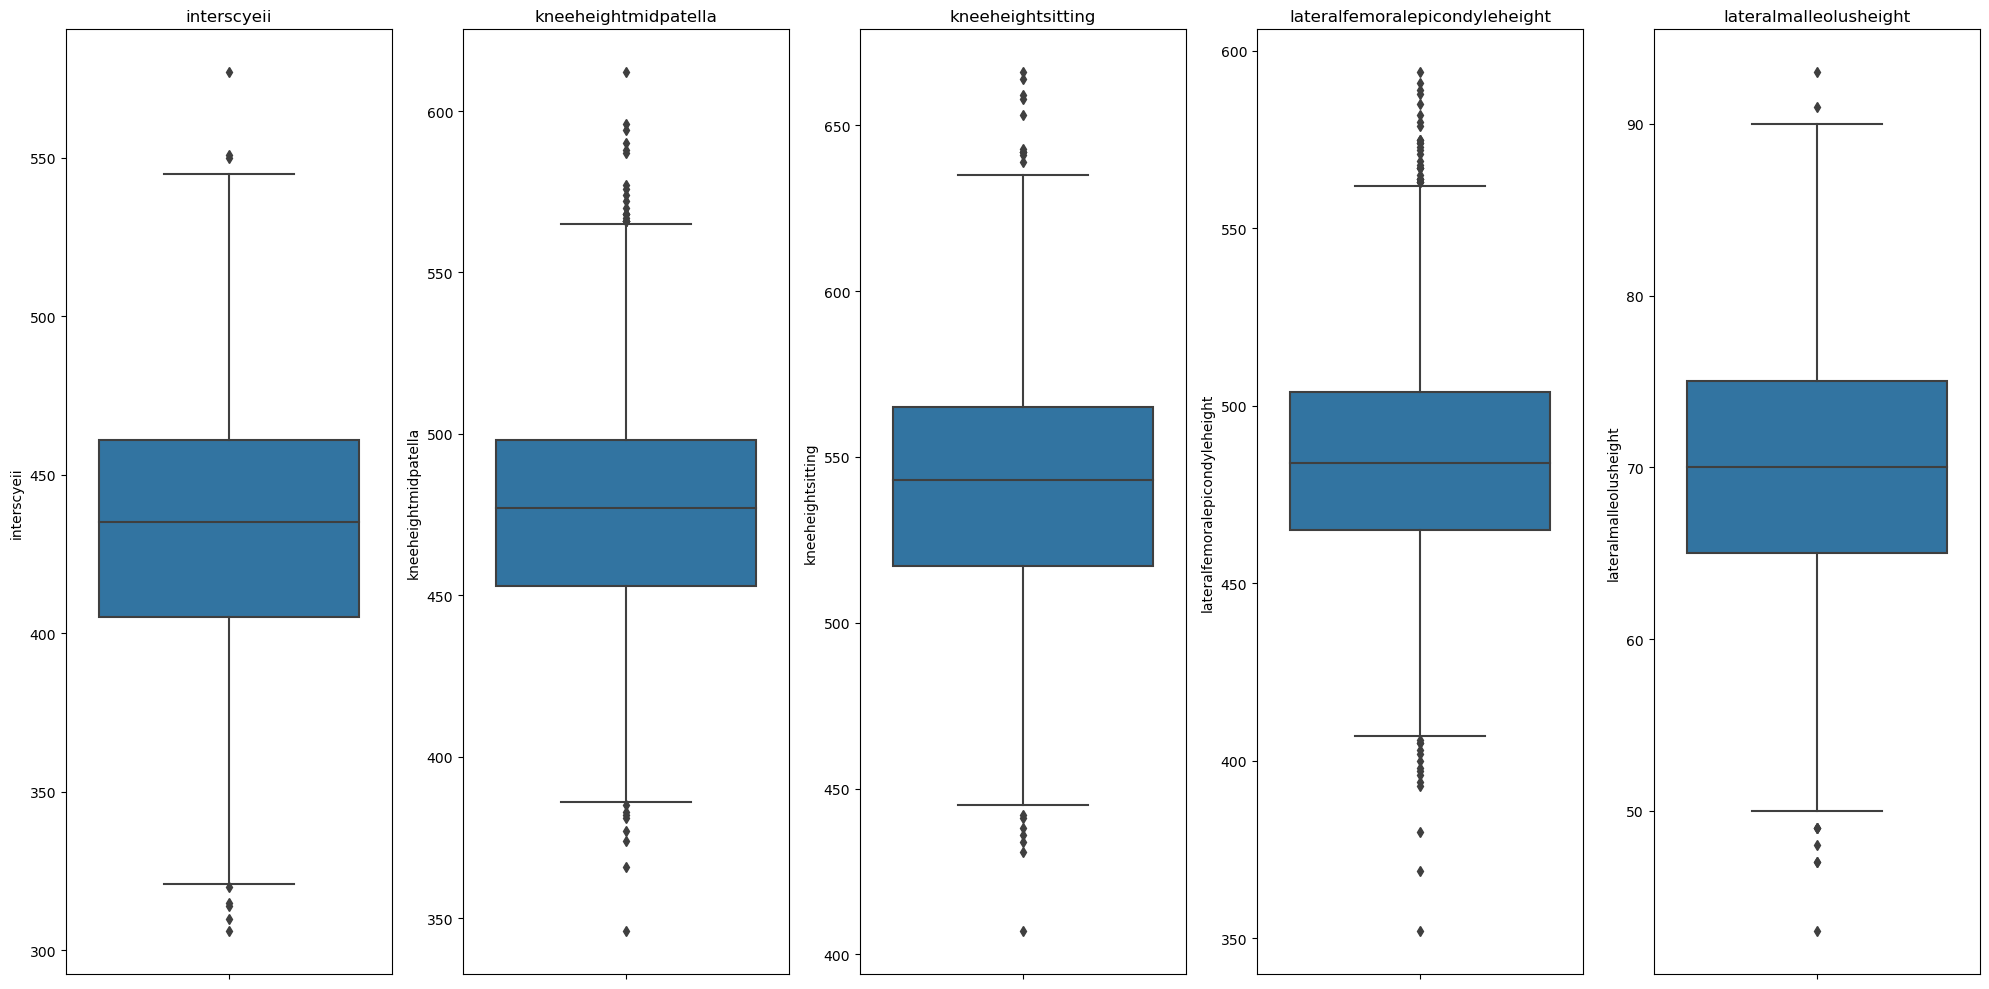

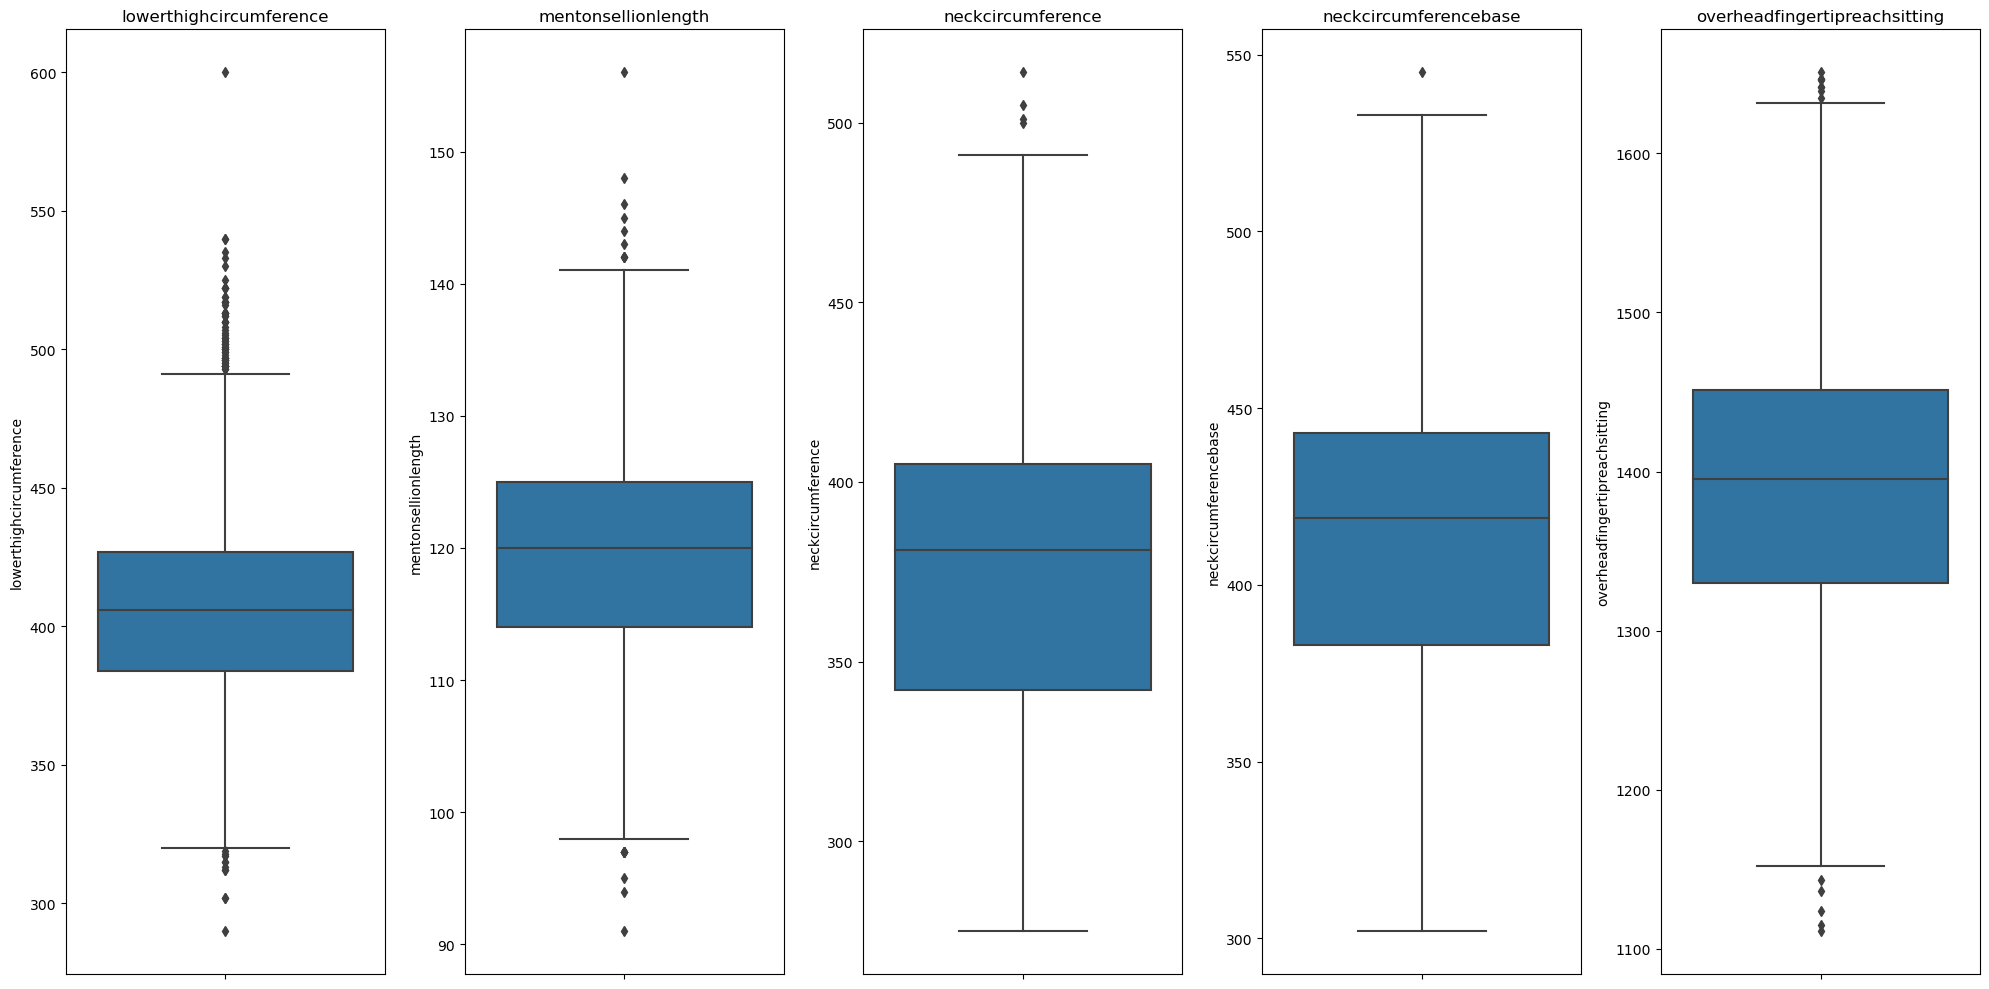

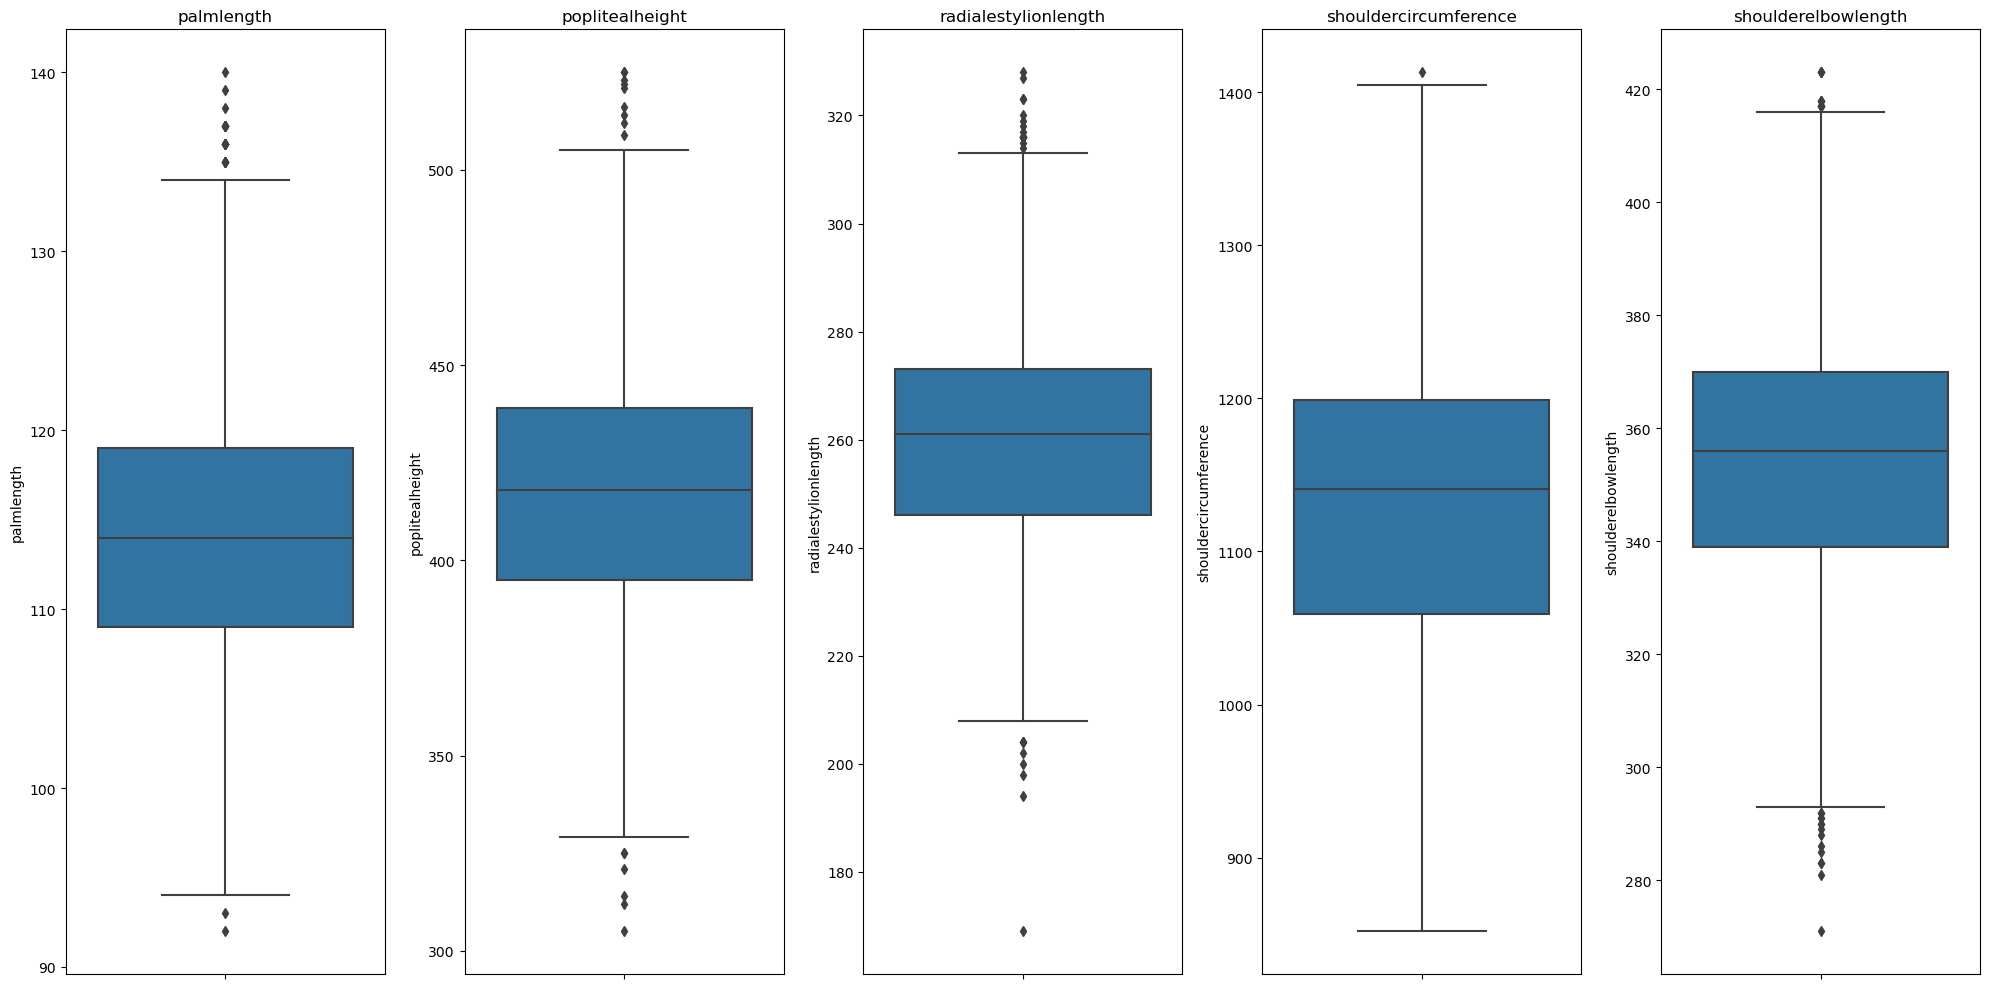

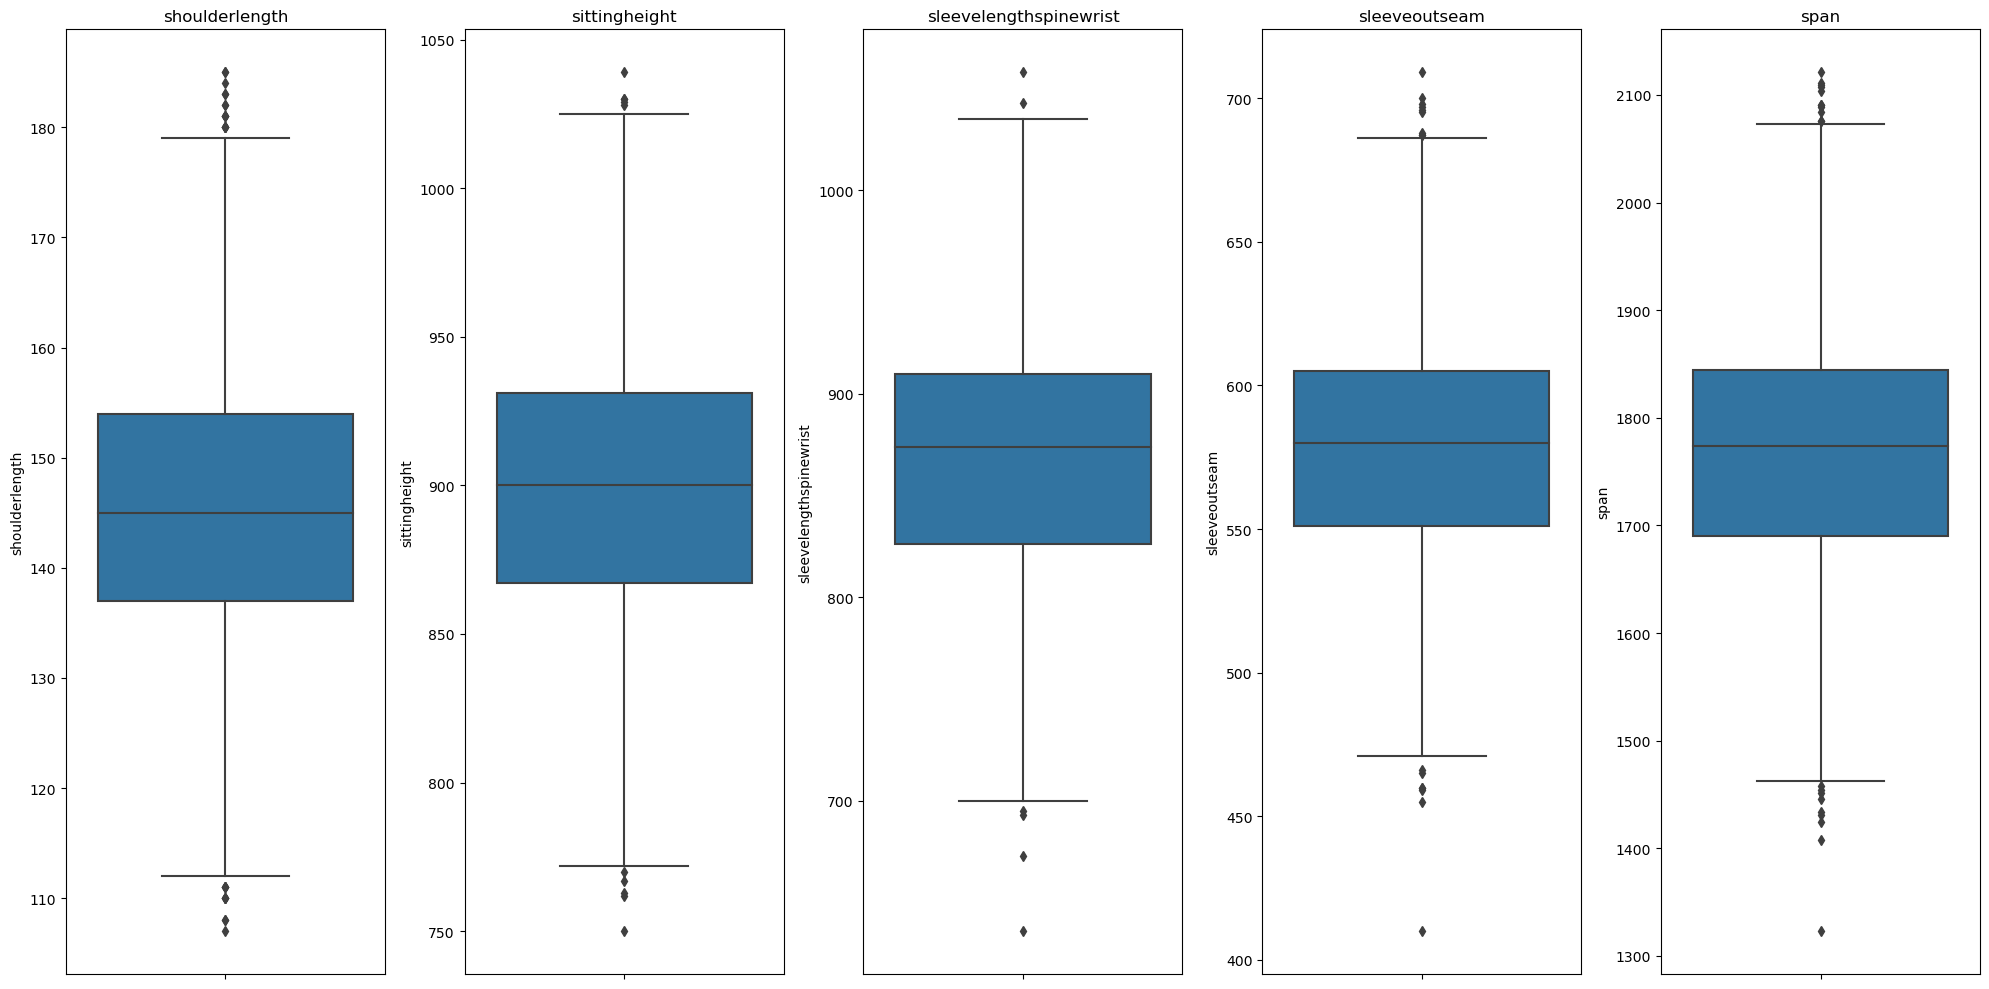

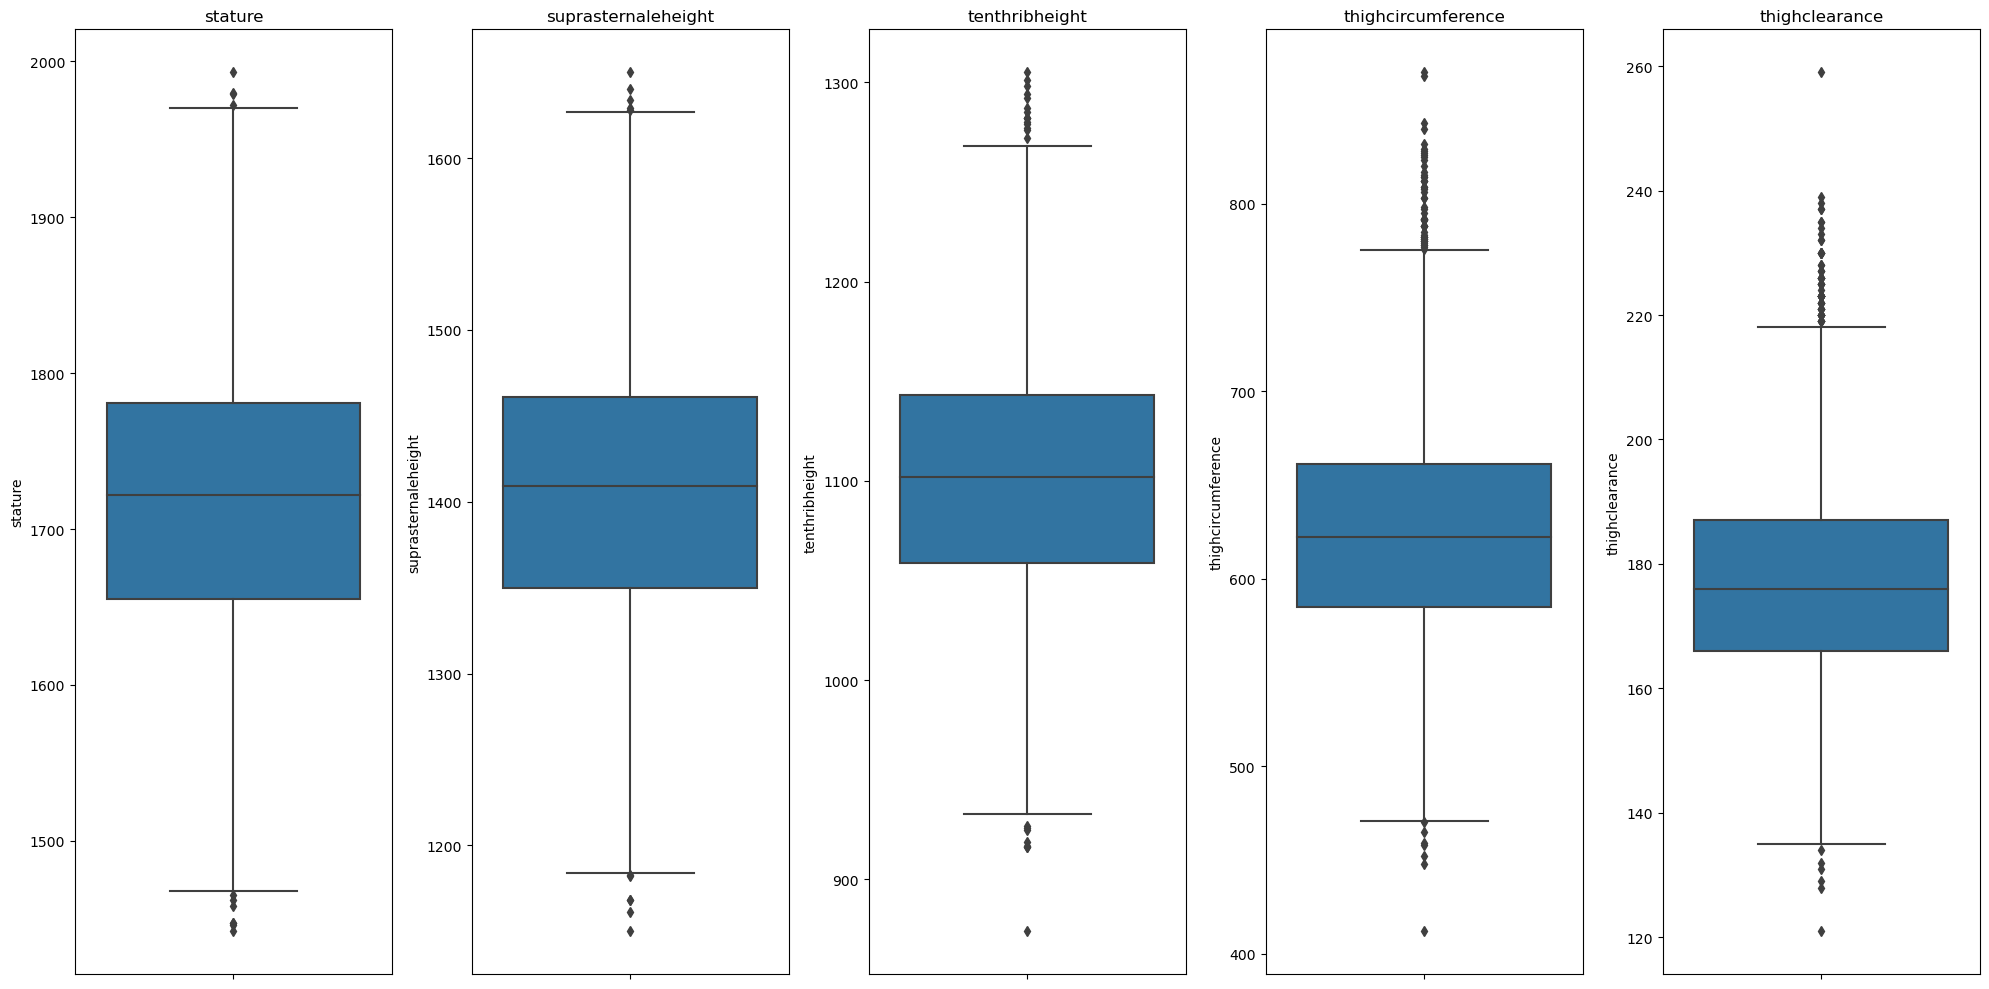

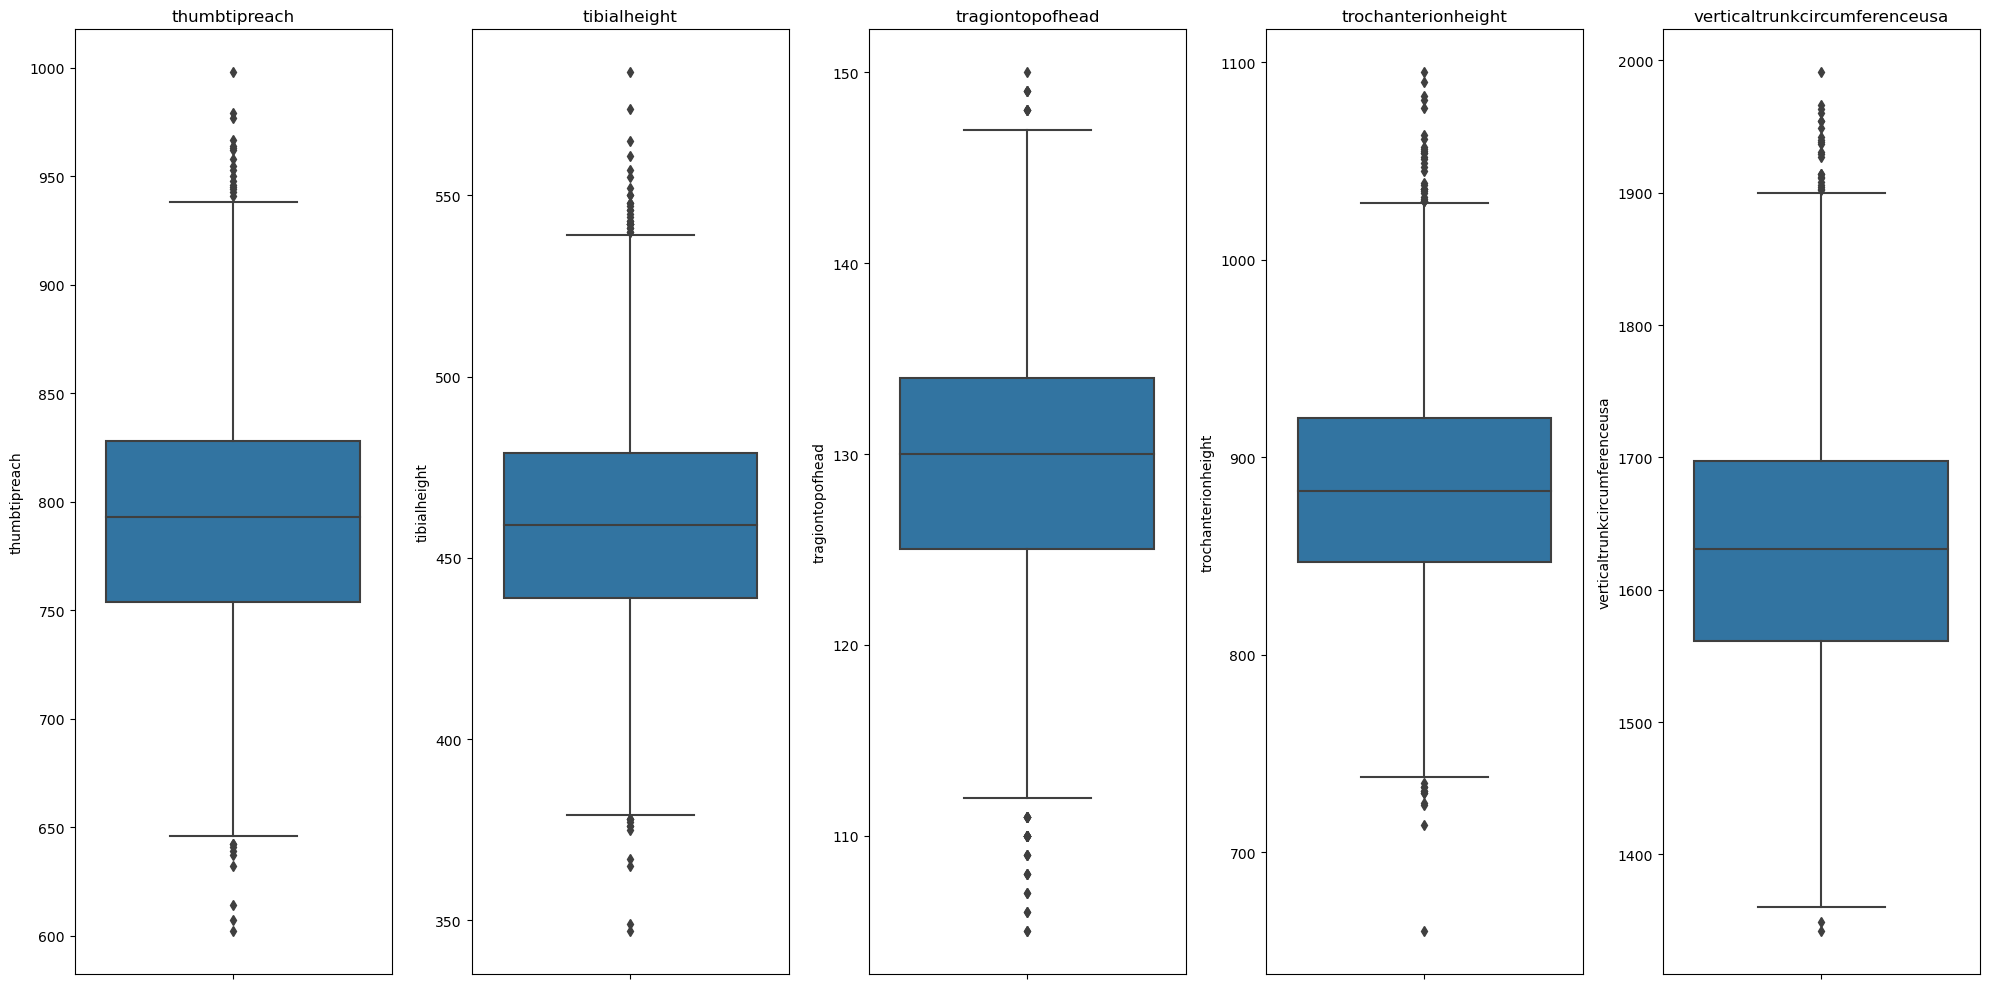

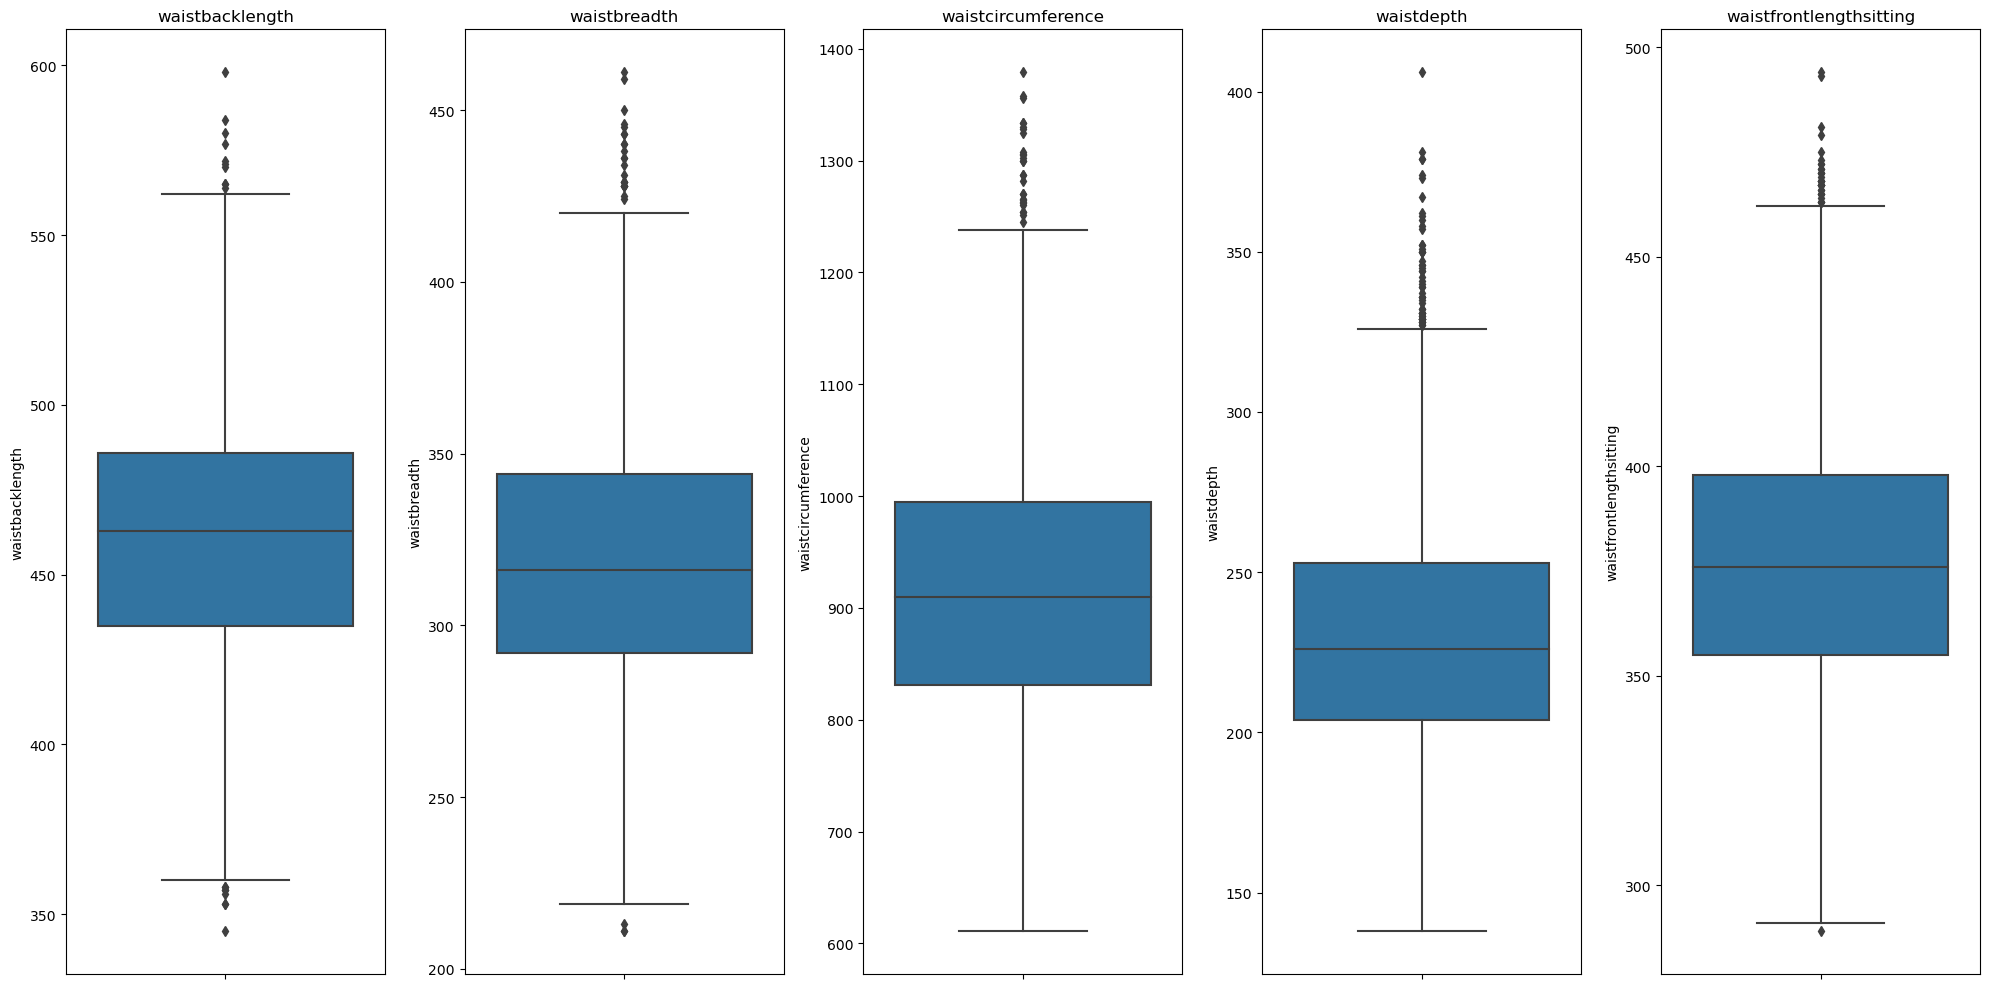

TypeError: Vertical orientation requires numeric `y` variable.

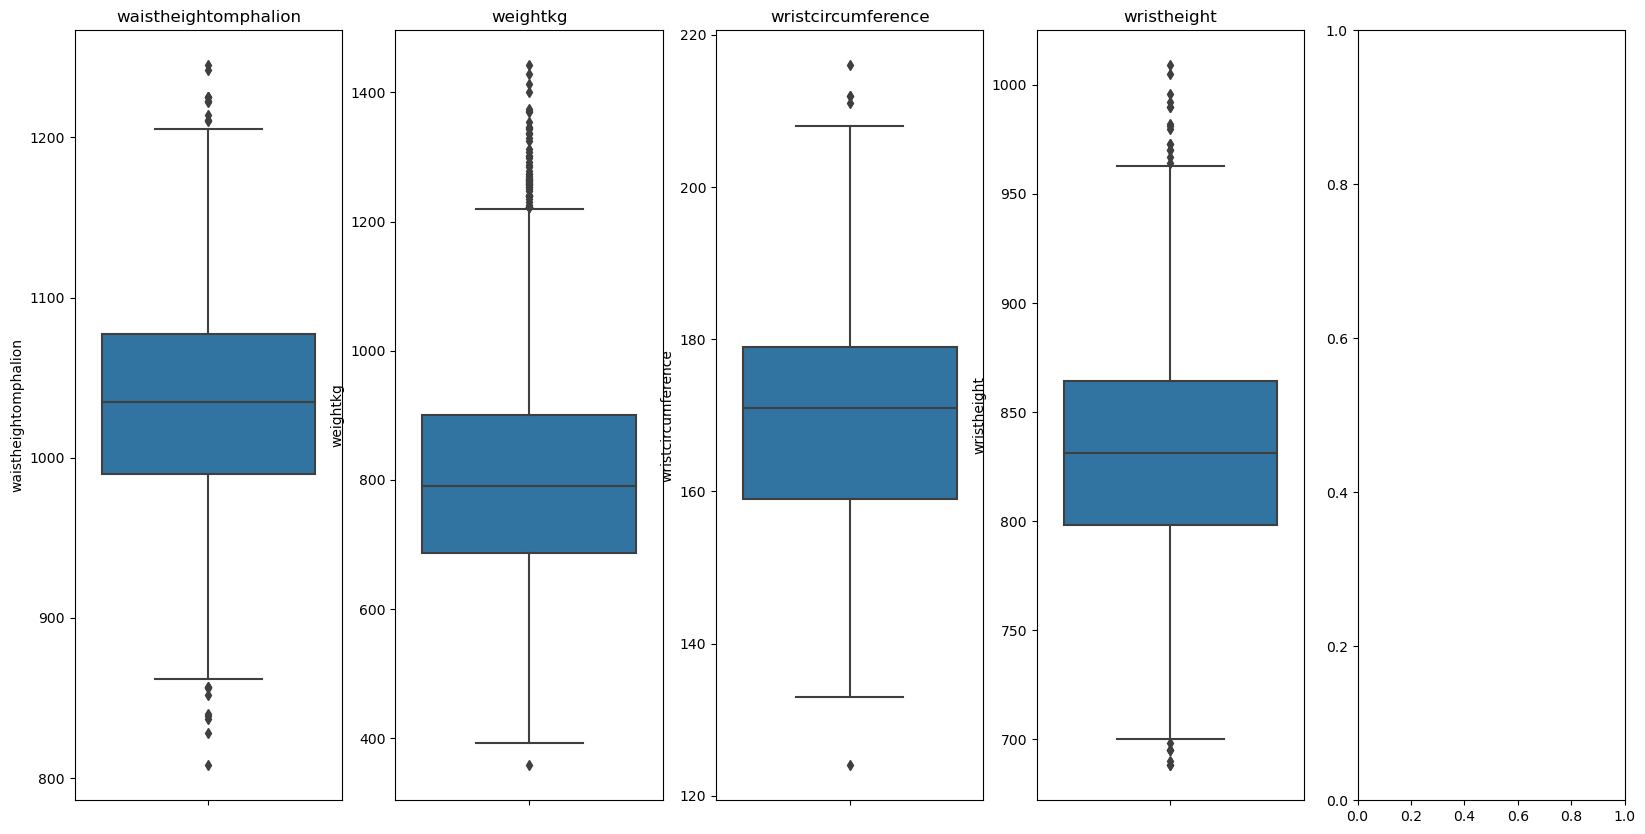

In [30]:
# Split the numerical columns into groups of 5
num_cols_groups = [df.columns[n:n+5] for n in range(0, len(df.columns), 5)]

# Create boxplots for each group of 5 numerical columns
for i, cols_group in enumerate(num_cols_groups):
    plt.figure(figsize=(20, 10))
    for j, col in enumerate(cols_group):
        plt.subplot(1, 5, j+1)
        sns.boxplot(y=col, data=df)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [31]:
df.subjectnumericrace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: subjectnumericrace, dtype: int64

In [32]:
# Drop the 'subjectnumericrace' column
df = df.drop(columns=['subjectnumericrace'])

# Check if the column has been dropped
'subjectnumericrace' not in df.columns

True

In [33]:
# Calculate the percentage of missing values in each column
missing_data = df.isnull().sum() / len(df) * 100

missing_data_percentage = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_percentage

Series([], dtype: float64)

In [34]:
# Get the non-numerical columns
non_numerical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Check the unique values of all non-numerical columns
unique_values = {col: df[col].unique() for col in non_numerical_columns}

unique_values

{'gender': array(['Male', 'Female'], dtype=object),
 'date': array(['4-Oct-10', '12-Oct-10', '6-Oct-10', '7-Oct-10', '13-Oct-10',
        '14-Oct-10', '15-Oct-10', '18-Oct-10', '19-Oct-10', '20-Oct-10',
        '21-Oct-10', '22-Oct-10', '25-Oct-10', '26-Oct-10', '27-Oct-10',
        '28-Oct-10', '29-Oct-10', '2-Nov-10', '4-Nov-10', '17-Nov-10',
        '16-Nov-10', '18-Nov-10', '19-Nov-10', '22-Nov-10', '23-Nov-10',
        '29-Nov-10', '30-Nov-10', '1-Dec-10', '2-Dec-10', '3-Dec-10',
        '6-Dec-10', '7-Dec-10', '10-Dec-10', '8-Dec-10', '13-Dec-10',
        '14-Dec-10', '5-Jan-11', '7-Jan-11', '10-Jan-11', '11-Jan-11',
        '12-Jan-11', '13-Jan-11', '19-Jan-11', '18-Jan-11', '20-Jan-11',
        '21-Jan-11', '27-Jan-11', '28-Jan-11', '30-Jan-11', '31-Jan-11',
        '7-Feb-11', '8-Feb-11', '9-Feb-11', '11-Feb-11', '15-Feb-11',
        '16-Feb-11', '17-Feb-11', '22-Feb-11', '24-Feb-11', '25-Feb-11',
        '9-Mar-11', '11-Mar-11', '14-Mar-11', '15-Mar-11', '16-Mar-11',
        

In [35]:
# Drop the columns which propably will not have useful information for the model
df = df.drop(['date', 'installation', 'component', 'branch', 'primarymos', 'subjectid', 'heightin', 'weightlbs'], axis=1)

In [36]:
df.shape

(5769, 98)

In [43]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

In [40]:
df2 = df[df["dodrace"].isin([1, 2, 3])]
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [41]:
df2.reset_index(drop=True, inplace=True)

In [42]:
df2

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [44]:
df2.describe().T

count         mean         std     min     25%     50%     75%     max
abdominalextensiondepthsitting  5769.0   247.254290   37.457748   155.0   220.0   243.0   272.0   451.0
acromialheight                  5769.0  1408.630265   78.303123  1146.0  1353.0  1412.0  1464.0  1683.0
acromionradialelength           5769.0   328.071590   20.444554   249.0   314.0   328.0   342.0   393.0
anklecircumference              5769.0   225.201768   15.965783   156.0   214.0   225.0   235.0   293.0
axillaheight                    5769.0  1301.902583   71.260913  1062.0  1252.0  1304.0  1351.0  1553.0
balloffootcircumference         5769.0   244.408043   16.803556   186.0   233.0   245.0   256.0   306.0
balloffootlength                5769.0   195.118911   13.379000   151.0   186.0   196.0   205.0   245.0
biacromialbreadth               5769.0   399.706015   30.124094   283.0   377.0   404.0   422.0   489.0
bicepscircumferenceflexed       5769.0   341.663027   41.270615   216.0   312.0   342.0   370.0   490.0
bicristalbreadth                5769.0   274.903449   19.239580   197.0   262.0   274.0   288.0   362.0
bideltoidbreadth                5769.0   491.454845   42.011888   357.0   461.0   493.0   520.0   637.0
bimalleolarbreadth              5769.0    72.335413    5.326965    55.0    68.0    73.0    76.0    91.0
bitragionchinarc                5769.0   324.962212   17.050426   267.0   314.0   326.0   336.0   385.0
bitragionsubmandibulararc       5769.0   306.677760   20.818789   245.0   292.0   307.0   321.0   390.0
bizygomaticbreadth              5769.0   139.529381    7.248670   116.0   134.0   140.0   145.0   166.0
buttockcircumference            5769.0  1022.059456   75.952953   737.0   970.0  1019.0  1071.0  1341.0
buttockdepth                    5769.0   242.234356   26.409001   168.0   223.0   241.0   259.0   349.0
buttockheight                   5769.0   872.112845   54.064846   656.0   834.0   870.0   908.0  1080.0
buttockkneelength               5769.0   610.449991   33.120828   479.0   587.0   610.0   633.0   736.0
buttockpopliteallength          5769.0   498.331773   28.512562   380.0   478.0   498.0   518.0   605.0
calfcircumference               5769.0   386.316519   30.577787   266.0   365.0   385.0   406.0   523.0
cervicaleheight                 5769.0  1479.952158   83.590746  1208.0  1421.0  1487.0  1539.0  1738.0
chestbreadth                    5769.0   283.232623   20.612214   213.0   269.0   283.0   297.0   363.0
chestcircumference              5769.0  1024.206622  100.375776   695.0   952.0  1023.0  1093.0  1469.0
chestdepth                      5769.0   252.322586   26.660255   170.0   234.0   251.0   270.0   383.0
chestheight                     5769.0  1254.290172   78.882449  1000.0  1199.0  1261.0  1310.0  1506.0
crotchheight                    5769.0   827.105738   54.056267   610.0   789.0   827.0   864.0  1031.0
crotchlengthomphalion           5769.0   622.693708   45.087220   473.0   592.0   621.0   652.0   799.0
crotchlengthposterioromphalion  5769.0   351.880222   29.807293   243.0   331.0   351.0   372.0   468.0
earbreadth                      5769.0    35.175420    3.221118    25.0    33.0    35.0    37.0    46.0
earlength                       5769.0    62.606171    4.861629    46.0    59.0    62.0    66.0    81.0
earprotrusion                   5769.0    22.227249    3.149012    13.0    20.0    22.0    24.0    34.0
elbowrestheight                 5769.0   240.553302   28.595503   138.0   222.0   241.0   260.0   345.0
eyeheightsitting                5769.0   786.399203   41.843182   654.0   757.0   788.0   816.0   912.0
footbreadthhorizontal           5769.0    98.915063    6.658949    77.0    94.0    99.0   104.0   126.0
footlength                      5769.0   263.512394   17.231642   210.0   252.0   265.0   276.0   323.0
forearmcenterofgriplength       5769.0   339.458832   23.081597   258.0   323.0   341.0   356.0   416.0
forearmcircumferenceflexed      5769.0   295.661640   29.857253   200.0   273.0  

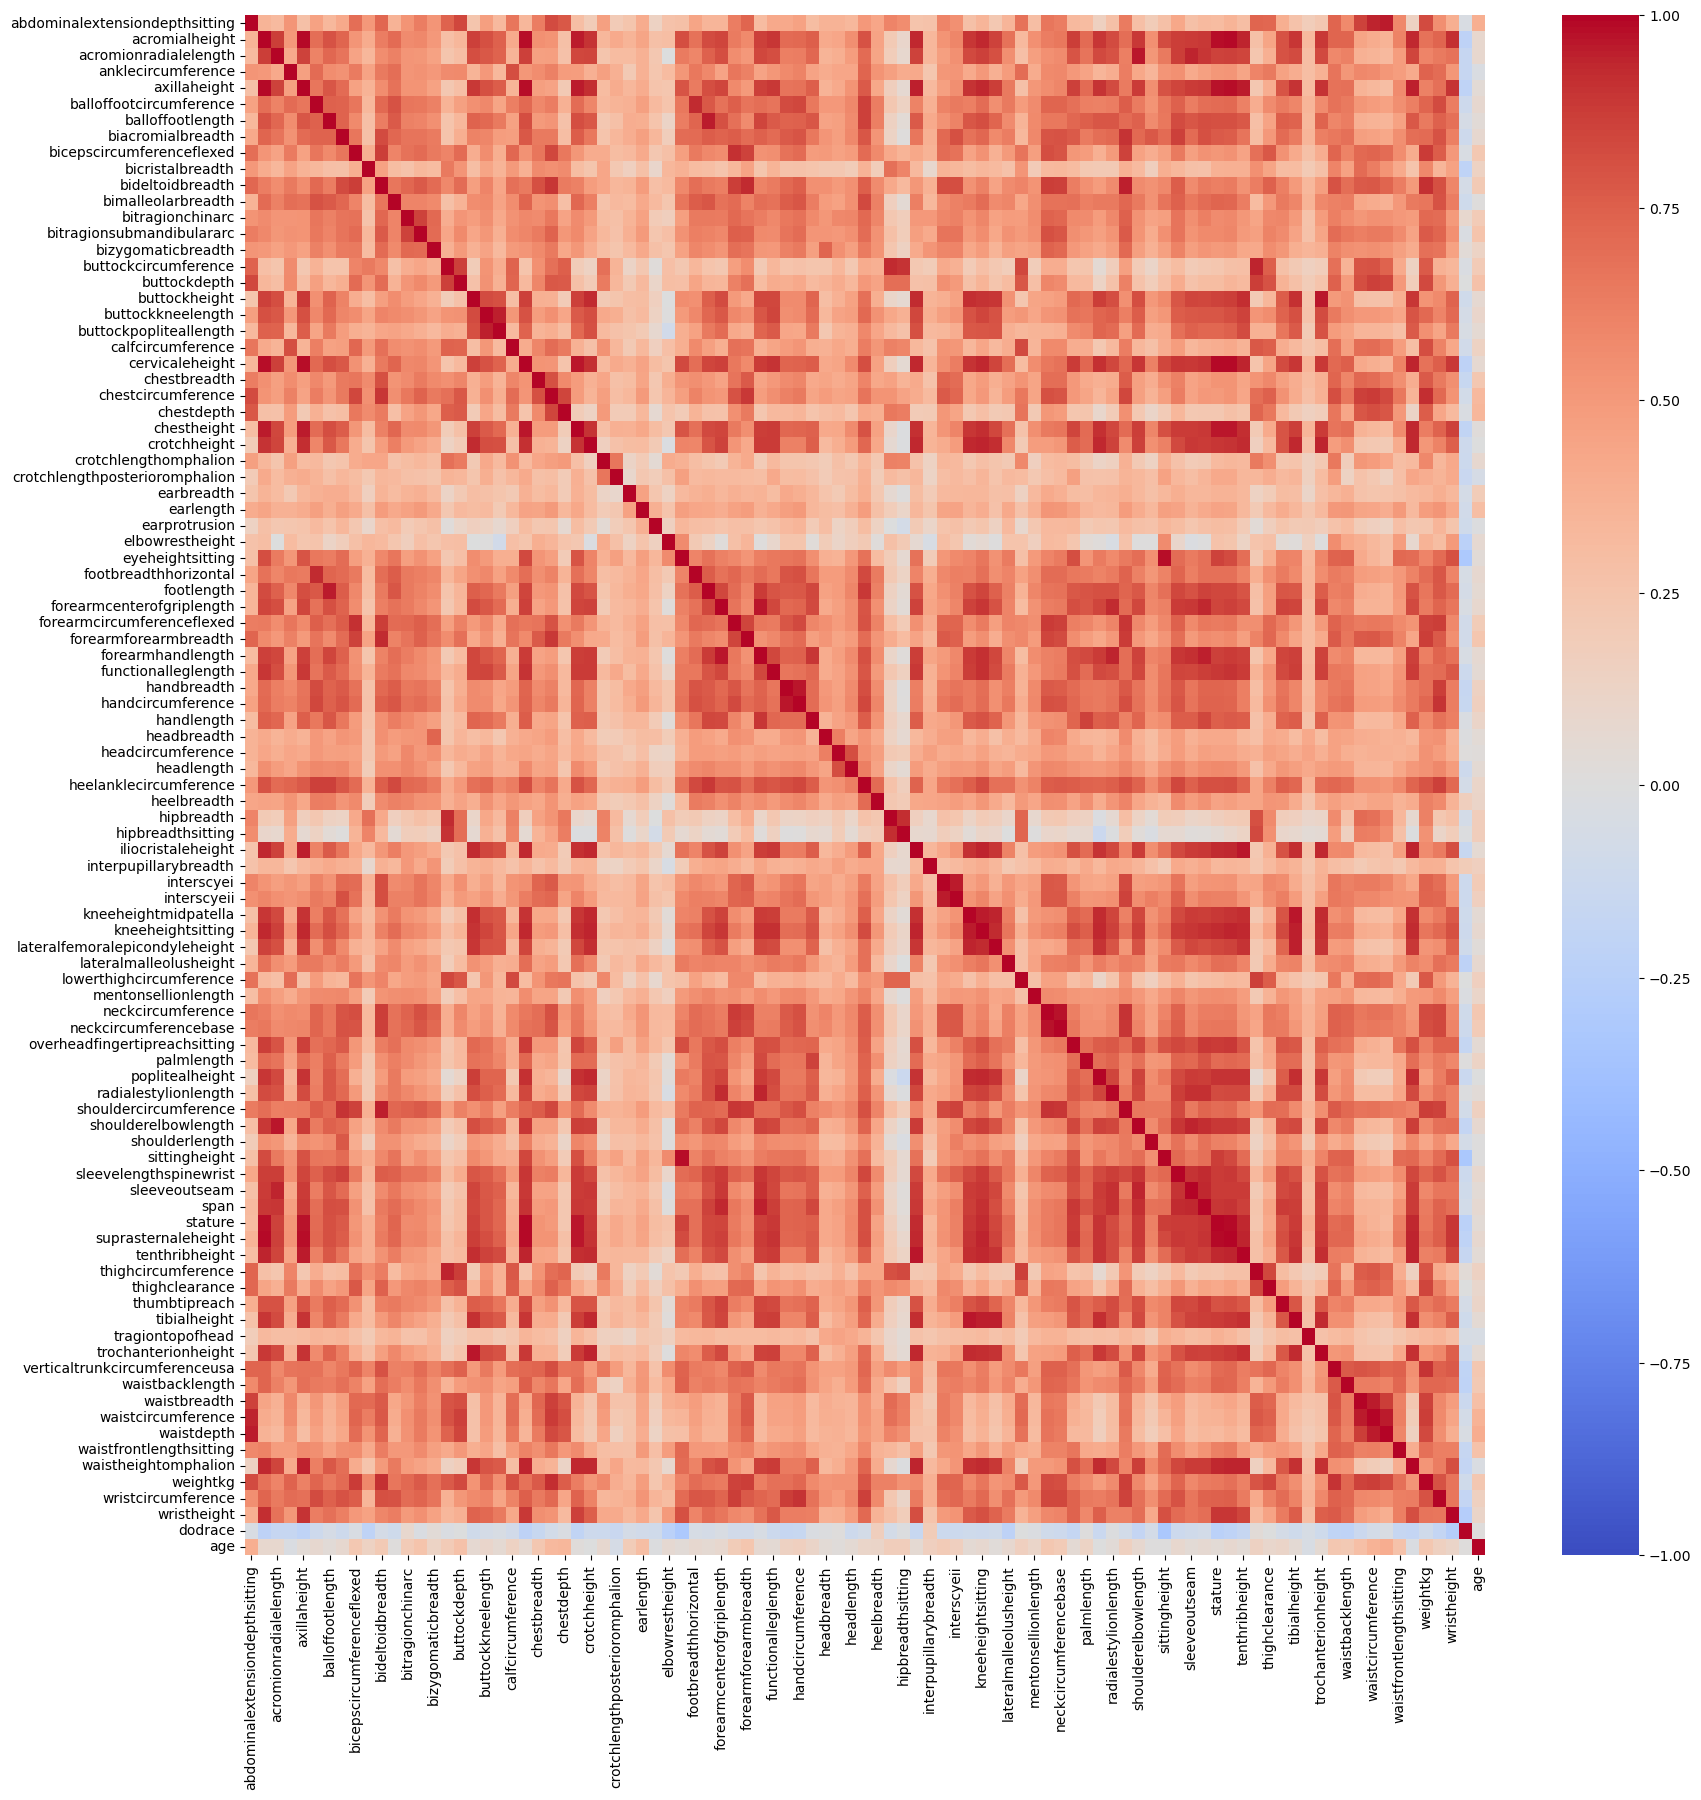

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [46]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [47]:
X = df2.drop(columns=["dodrace"])
y = df2.dodrace

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [49]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [52]:
# Identify columns with only two unique values (potential binary variables)
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

binary_columns

['gender']

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [54]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [55]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[651  17  90]
 [ 10 236  14]
 [ 22   9 105]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.90      0.91      0.90       260
           3       0.50      0.77      0.61       136

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2626   64  344]
 [  26  974   38]
 [  67   19  457]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.54      0.84      0.66       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [56]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=[3]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[3]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[3]),
}

In [57]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


test_precision_Hispanic     0.496350
train_precision_Hispanic    0.544204
test_recall_Hispanic        0.778923
train_recall_Hispanic       0.842846
test_f1_Hispanic            0.605424
train_f1_Hispanic           0.661348
dtype: float64

### Logistic Model GridsearchCV

In [58]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=[3])

In [59]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [60]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [61]:
log_model_grid.fit(X_train, y_train)

/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [62]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [63]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.780741
mean_train_score    0.833229
Name: 3, dtype: object

In [64]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[652  18  88]
 [  9 238  13]
 [ 22  10 104]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.89      0.92      0.90       260
           3       0.51      0.76      0.61       136

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2611   66  357]
 [  30  965   43]
 [  71   21  451]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.92      0.93      0.92      1038
           3       0.53      0.83      0.65       543

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



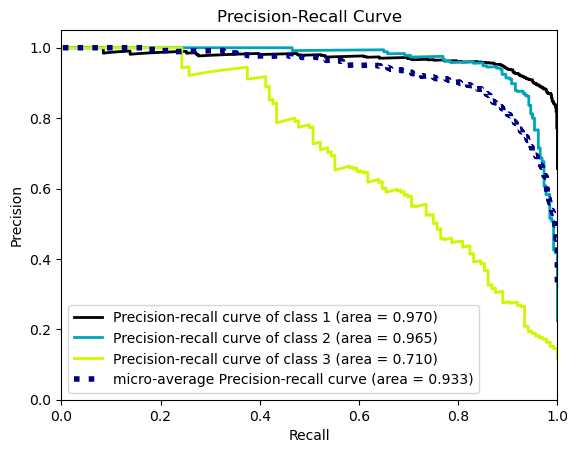

In [65]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [66]:
pd.get_dummies(y_test).values

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [67]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9645564195282688

In [68]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## Logistic Regression solver "liblenear" for small dataset

In [69]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)

In [70]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[707  13  38]
 [ 14 241   5]
 [ 44  11  81]]
              precision    recall  f1-score   support

           1       0.92      0.93      0.93       758
           2       0.91      0.93      0.92       260
           3       0.65      0.60      0.62       136

    accuracy                           0.89      1154
   macro avg       0.83      0.82      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2844   42  148]
 [  44  976   18]
 [ 128   28  387]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3034
           2       0.93      0.94      0.94      1038
           3       0.70      0.71      0.71       543

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [71]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.658711
train_precision_Hispanic    0.699818
test_recall_Hispanic        0.668485
train_recall_Hispanic       0.707181
test_f1_Hispanic            0.663180
train_f1_Hispanic           0.703441
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [72]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [73]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[622  17 119]
 [ 14 232  14]
 [ 29   8  99]]
              precision    recall  f1-score   support

           1       0.94      0.82      0.87       758
           2       0.90      0.89      0.90       260
           3       0.43      0.73      0.54       136

    accuracy                           0.83      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[2561   44  429]
 [  44  953   41]
 [  73   19  451]]
              precision    recall  f1-score   support

           1       0.96      0.84      0.90      3034
           2       0.94      0.92      0.93      1038
           3       0.49      0.83      0.62       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [74]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.460403
train_precision_Hispanic    0.495141
test_recall_Hispanic        0.782593
train_recall_Hispanic       0.834662
test_f1_Hispanic            0.579185
train_f1_Hispanic           0.621540
dtype: float64

###  SVC Model GridsearchCV

In [75]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [76]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [77]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [78]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [79]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.782593
mean_train_score    0.834662
Name: 3, dtype: object

In [80]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[622  17 119]
 [ 14 232  14]
 [ 29   8  99]]
              precision    recall  f1-score   support

           1       0.94      0.82      0.87       758
           2       0.90      0.89      0.90       260
           3       0.43      0.73      0.54       136

    accuracy                           0.83      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[2561   44  429]
 [  44  953   41]
 [  73   19  451]]
              precision    recall  f1-score   support

           1       0.96      0.84      0.90      3034
           2       0.94      0.92      0.93      1038
           3       0.49      0.83      0.62       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



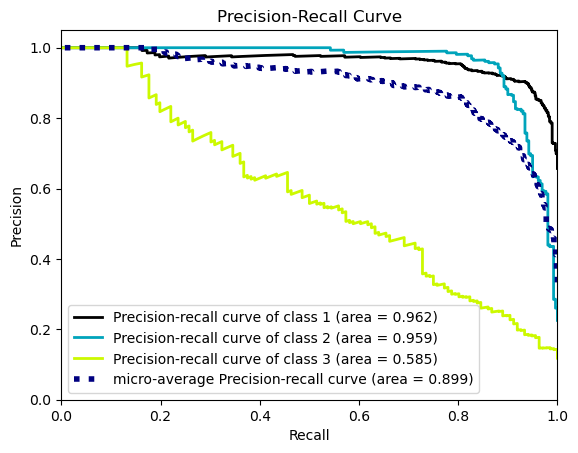

In [81]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [82]:
decision_function

array([[ 1.1730346 ,  2.2243297 , -0.25276847],
       [ 2.25616604, -0.24564491,  0.88621317],
       [ 2.22065917,  0.91650839, -0.20631074],
       ...,
       [ 1.13819931, -0.23813006,  2.2139896 ],
       [-0.21098532,  2.25325054,  0.8033969 ],
       [ 2.20214438, -0.17384804,  0.89642378]])

In [83]:
model.classes_

array([1, 2, 3])

In [84]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.959013924446618

In [85]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svc_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

In [86]:
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [87]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [88]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [89]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[748   9   1]
 [ 76 184   0]
 [120  13   3]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.89      0.71      0.79       260
           3       0.75      0.02      0.04       136

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.57      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [90]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.831429
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.035032
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.066770
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [91]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
}

In [92]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [93]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [94]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [95]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [96]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.639144
mean_train_score    0.674953
Name: 3, dtype: object

In [97]:
rf_grid_model.best_score_

0.6391437308868502

In [98]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[397  81 280]
 [ 29 194  37]
 [ 32  22  82]]
              precision    recall  f1-score   support

           1       0.87      0.52      0.65       758
           2       0.65      0.75      0.70       260
           3       0.21      0.60      0.31       136

    accuracy                           0.58      1154
   macro avg       0.58      0.62      0.55      1154
weighted avg       0.74      0.58      0.62      1154


Train_Set
[[1637  282 1115]
 [  76  806  156]
 [ 133   43  367]]
              precision    recall  f1-score   support

           1       0.89      0.54      0.67      3034
           2       0.71      0.78      0.74      1038
           3       0.22      0.68      0.34       543

    accuracy                           0.61      4615
   macro avg       0.61      0.66      0.58      4615
weighted avg       0.77      0.61      0.65      4615



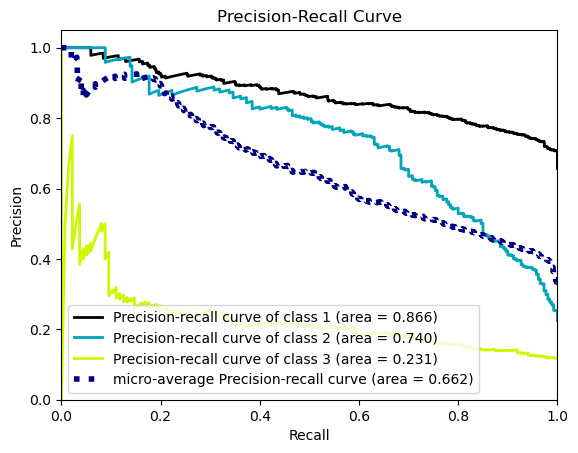

In [99]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [100]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7403604229820184

In [101]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
rf_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 4. XGBoost

### Vanilla XGBoost Model

In [109]:
# Subtract 1 from each class label in the target data
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)

# Fit the model with the adjusted target data
pipe_model_xgb.fit(X_train, y_train_xgb)  


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [110]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[733  10  15]
 [ 30 228   2]
 [ 85  17  34]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       758
           1       0.89      0.88      0.89       260
           2       0.67      0.25      0.36       136

    accuracy                           0.86      1154
   macro avg       0.81      0.70      0.72      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [111]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [112]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
397   2.833026      2
3261  2.833026      2
5285  0.507031      0
2080  2.833026      2
4065  1.482017      1

In [113]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights 
0      0.507031    3034
1      1.482017    1038
2      2.833026     543
dtype: int64

In [114]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [100]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       260
           1       0.74      0.47      0.58       136
           2       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [115]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [116]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


test_precision_Hispanic     0.885928
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.860303
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.872895
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [117]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [118]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [119]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [120]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [121]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [122]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.762073
mean_train_score    0.787573
Name: 31, dtype: object

In [123]:
xgb_grid_model.best_score_

0.7620726495726495

In [124]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[512  77 169]
 [ 25 201  34]
 [ 39  25  72]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       758
           1       0.66      0.77      0.71       260
           2       0.26      0.53      0.35       136

    accuracy                           0.68      1154
   macro avg       0.60      0.66      0.61      1154
weighted avg       0.76      0.68      0.71      1154


Train_Set
[[2081  309  644]
 [  89  817  132]
 [ 120   59  364]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      3034
           1       0.69      0.79      0.74      1038
           2       0.32      0.67      0.43       543

    accuracy                           0.71      4615
   macro avg       0.64      0.71      0.65      4615
weighted avg       0.79      0.71      0.73      4615



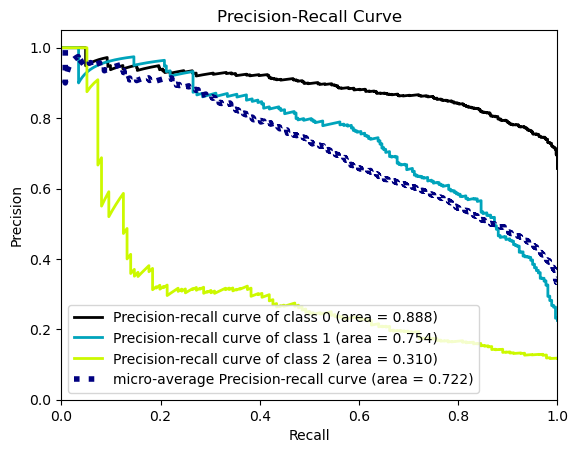

In [125]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [126]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [127]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.7540737457964479

In [128]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

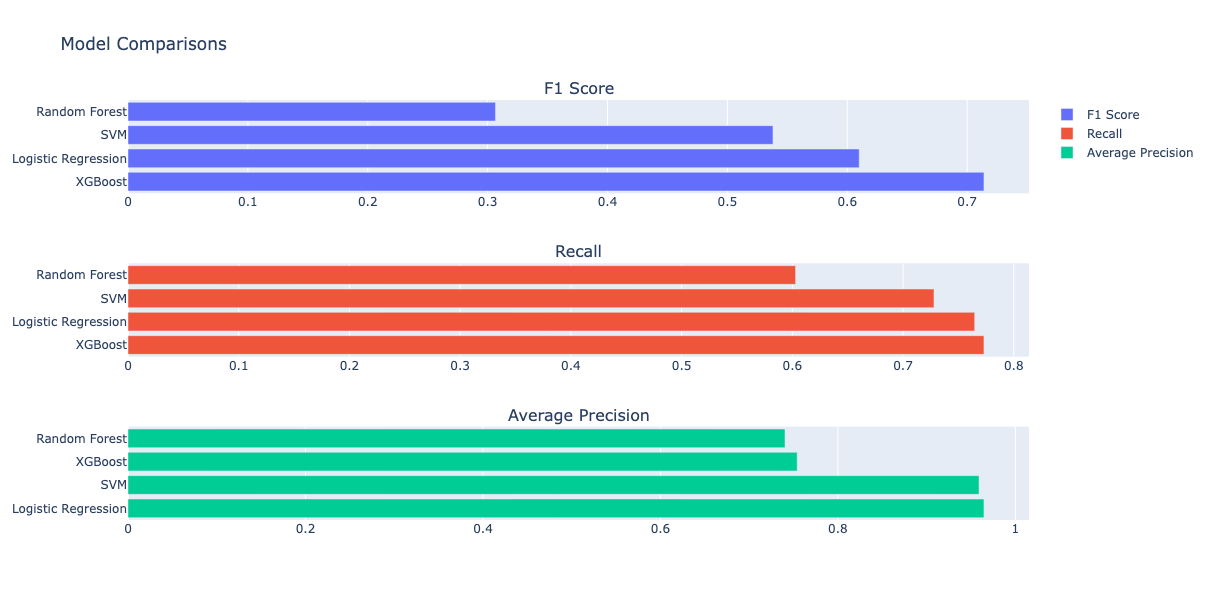

In [131]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Setting up the data
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)

# Sorting and creating the subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=('F1 Score', 'Recall', 'Average Precision'))

compare = compare.sort_values(by="F1", ascending=False)
fig.add_trace(go.Bar(x=compare['F1'], y=compare['Model'], orientation='h', name='F1 Score'), row=1, col=1)

compare = compare.sort_values(by="Recall", ascending=False)
fig.add_trace(go.Bar(x=compare['Recall'], y=compare['Model'], orientation='h', name='Recall'), row=2, col=1)

compare = compare.sort_values(by="AP", ascending=False)
fig.add_trace(go.Bar(x=compare['AP'], y=compare['Model'], orientation='h', name='Average Precision'), row=3, col=1)

fig.update_layout(height=600, width=800, title_text="Model Comparisons")
fig.show()


---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [132]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [133]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [135]:
X[X.gender == "Male"].describe()

# We will make predictions on the model based on the average
# values of all male soldiers in our data.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     3899.000000     3899.000000            3899.000000         3899.000000   3899.000000               3899.00000       3899.000000        3899.000000                3899.000000       3899.000000       3899.000000         3899.000000       3899.000000                3899.000000         3899.000000           3899.000000   3899.000000    3899.000000        3899.000000             3899.000000        3899.000000      3899.000000   3899.000000         3899.000000  3899.000000  3899.000000   3899.000000            3899.000000                     3899.000000  3899.000000  3899.000000    3899.000000      3899.000000       3899.000000            3899.000000  3899.000000                3899.000000                 3899.000000            3899.000000        3899.000000          3899.000000  3899.000000        3899.000000  3899.000000  3899.000000        3899.000000  3899.000000             3899.000000  3899.000000  3899.000000        3899.000000         3899.000000   
mean                       255.449090     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546         416.004360                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026         392.426520      1519.422160    289.786868         1060.496794   254.390100  1293.040267    847.637599             623.143114                      356.354706    36.095153    64.171070      23.109772       244.823544        804.885099             101.893819   271.573993                 349.573480                  310.528084             580.702231         480.928956          1132.125673    88.379841         212.571172   193.509361   154.183637         574.708130   199.760708              344.002052    72.564504   346.256732         379.948448         1063.412670   
std                         37.295117       62.356906              17.281413           14.579399     58.714251                 12.89351         10.329358          19.074837                  34.511924         17.512428         32.450260            4.097052         13.970798                  16.640502            6.141613             76.330564     26.422432      49.412061          30.060334               26.981352          29.698052        62.429846     18.190824           87.116923    26.173356    56.142581     45.922897              46.408840                       29.395642     3.011680     4.499327       2.983150        28.714115         33.091957               5.227999    12.927804                  17.874884                   21.844380              50.829944          23.082555            55.414466     4.350016          10.141394     9.881058     5.453721          15.956198     6.854976               16.409163     5.473677    24.074708          30.120115           51.461725   
min                        163.000000  

In [136]:
male_mean_human = X[X.gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [137]:
male_mean_human["gender"] = "Male"
male_mean_human["subjectsbirthlocation"] = "California"
male_mean_human["writingpreference"] = "Right hand"

In [138]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference chestdepth  chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal  footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference  handlength headbreadth headcircumference  headlength heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean                      255.44909    1442.946397            335.819441         229.590921  1331.098487               252.16594       201.229546         416.00436                358.579636       275.632213       510.927674          74.844063       331.655809                315.718389         142.434983          1021.294178   246.362401    889.500385        619.217235             504.001026         392.42652      1519.42216   289.786868        1060.496794   254.3901  1293.040267   847.637599            623.143114                     356.354706  36.095153  64.17107     23.109772      244.823544       804.885099            101.893819  271.573993                 349.57348                 310.528084            580.702231        480.928956         1132.125673   88.379841        212.571172  193.509361  154.183637         574.70813  199.760708             344.002052   72.564504  346.256732        379.948448         1063.41267            639.948705  431.393947  450.628623   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting  palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam         span      stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference waistdepth waistfrontlengthsitting waistheightomphalion    weightkg wristcircumference wristheight gender subjectsbirthlocation        age writingpreference  
mean           489.366504        555.224929                     492.625545              73.061554              409.670685          122.684534        398.192101            435.159528                   1428.469351  116.610156      430.684791           268.313927           1179.902539          364.305976     149.832265    918.678636             897.179277    594.007951  1816.628879  1758.385483         1440.699667    1122.444473         626.335214      180.73942    813.085407   469.222878       131.116697          902.586817                   1666.783278      478.017953   327.110798         943.043344   238.5604               388.01744          1058.239805  858.714286         176.168761  848.762247   Male            California  30.172352        Right hand

In [139]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array([3])

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [140]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.7779568608821062

In [141]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7719425125932404

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

## Logistic Regression Over/Under Sampling

## Other Evaluation Metrics for Multiclass Classification

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [144]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [145]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [146]:
X.gender.describe()

count     5769
unique       2
top       Male
freq      3899
Name: gender, dtype: object

In [147]:
X.gender.value_counts()

Male      3899
Female    1870
Name: gender, dtype: int64

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
